In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score,StratifiedKFold,KFold
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize,RobustScaler,StandardScaler
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotUniform,RandomUniform,Constant
import time

HGCC

In [2]:
# load HGCC
hgcc = pd.read_csv("D:/ErasmusMC/Erasmus MC/Hanarth - IMPRESSING-GBM/Gliotrain/DrugResponsePrediction/HGCC/expression_HGCC_process_17419.txt")
hgcc = hgcc.set_index(['Unnamed: 0'])
hgcc

TSPAN6      TNMD      DPM1     SCYL3  C1orf112        FGR  \
Unnamed: 0                                                                
U3002       5.233414  1.946372  2.660420  6.892279  6.102253  10.150239   
U3005       4.638291  1.773794  2.940720  6.879116  6.111907  10.183847   
U3008       5.628872  1.989806  3.222674  6.857331  5.412678  10.000939   
U3009       4.769873  1.706133  2.992917  7.151517  6.208981  10.065556   
U3013       5.334269  1.917430  3.013803  6.844563  5.694944  10.170692   
...              ...       ...       ...       ...       ...        ...   
U3279       5.059770  1.743322  3.212913  6.687213  5.230734   9.947862   
U3281       5.506877  2.275515  2.621987  6.427750  5.424920  10.098166   
U3289       4.601688  1.848447  2.675119  6.699410  5.548274  10.052378   
U3291       4.872073  1.931732  2.575432  6.537216  4.958341  10.040752   
U3299       5.356058  1.830245  2.039635  7.458398  6.004312  10.023197   

                  CFH     FUCA2       GCLC      NFYA  ...  LINC00638  SMIM6  \
Unnamed: 0                                            ...                     
U3002       28.709341  1.790770  14.696460  4.512648  ...          0      0   
U3005       29.519232  2.289351  14.823729  4.953917  ...          0      0   
U3008       31.131291  1.912692  15.189328  4.723261  ...          0      0   
U3009       29.047655  1.588500  15.295365  4.679638  ...          0      0   
U3013       28.603761  2.948010  15.762985  5.005224  ...          0      0   
...               ...       ...        ...       ...  ...        ...    ...   
U3279       28.065632  1.778032  15.255000  4.788047  ...          0      0   
U3281       29.399037  1.188470  15.243622  4.786237  ...          0      0   
U3289       30.250448  1.467189  15.184623  4.748379  ...          0      0   
U3291       29.360780  1.258349  15.056295  4.661365  ...          0      0   
U3299       29.183810  2.015058  15.434776  4.899980  ...          0      0   

            LINC00596  OR4N3P  SH3RF3-AS1  LINC00657  MOCS1P1  GOLGA6L7P  \
Unnamed: 0                                                                 
U3002               0       0           0          0        0          0   
U3005               0       0           0          0        0          0   
U3008               0       0           0          0        0          0   
U3009               0       0           0          0        0          0   
U3013               0       0           0          0        0          0   
...               ...     ...         ...        ...      ...        ...   
U3279               0       0           0          0        0          0   
U3281               0       0           0          0        0          0   
U3289               0       0           0          0        0          0   
U3291               0       0           0          0        0          0   
U3299               0       0           0          0        0          0   

            POLRMTP1  UBL5P2  
Unnamed: 0                    
U3002              0       0  
U3005              0       0  
U3008              0       0  
U3009              0       0  
U3013              0       0  
...              ...     ...  
U3279              0       0  
U3281              0       0  
U3289              0       0  
U3291              0       0  
U3299              0       0  

[83 rows x 17419 columns]

In [3]:
# load GDSC
exp = pd.read_csv("D:/ErasmusMC/Erasmus MC/Hanarth - IMPRESSING-GBM/Gliotrain/DrugResponsePrediction/CCLE_preprocess/gdsc_exp.csv")
exp = exp.set_index(['Unnamed: 0'])
exp = exp.T
exp

Unnamed: 0    TSPAN6      TNMD       DPM1     SCYL3  C1orf112       FGR  \
CAL-120     7.632023  2.964585  10.379553  3.614794  3.380681  3.324692   
DMS-114     7.548671  2.777716  11.807341  4.066887  3.732485  3.152404   
CAL-51      8.712338  2.643508   9.880733  3.956230  3.236620  3.241246   
H2869       7.797142  2.817923   9.883471  4.063701  3.558414  3.101247   
H290        7.729268  2.957739  10.418840  4.341500  3.840373  3.001802   
...              ...       ...        ...       ...       ...       ...   
MOG-G-UVW   8.373223  2.852552  10.454830  3.858121  3.196988  3.098083   
JIMT-1      8.441628  2.639276  11.463742  4.425849  4.384732  3.229511   
PEO1        8.422922  2.879890  10.557777  3.550390  4.247189  3.176336   
PL4         8.089255  2.521169  10.792750  4.443337  3.071359  3.238305   
TT          3.112333  2.870468   9.873902  4.266828  3.230197  3.027742   

Unnamed: 0       CFH     FUCA2      GCLC      NFYA  ...  LINC00514     OR1D5  \
CAL-120     3.566350  8.204530  5.235118  5.369039  ...   3.665788  3.134197   
DMS-114     7.827172  6.616972  5.809264  7.209653  ...   3.053174  3.327528   
CAL-51      2.931034  8.191246  5.426841  5.120747  ...   3.226808  3.326309   
H2869       7.211707  8.630643  5.617714  4.996434  ...   3.110801  2.921903   
H290        3.375422  8.296950  5.669418  4.180205  ...   3.285372  3.474086   
...              ...       ...       ...       ...  ...        ...       ...   
MOG-G-UVW   7.483200  9.149982  6.055008  5.213701  ...   3.411736  2.928147   
JIMT-1      3.571204  8.193000  5.671600  4.943996  ...   3.390231  3.402212   
PEO1        3.321811  8.901706  4.684851  4.215908  ...   3.016188  3.841095   
PL4         5.209472  8.073389  5.643811  5.040952  ...   4.133042  3.221974   
TT          3.407148  5.760610  5.834256  5.550722  ...   2.910977  3.116006   

Unnamed: 0    ZNF234      MYH4  LINC00526      PPY2  KRT18P55  POLRMTP1  \
CAL-120     4.841169  2.628932   6.786925  2.997054  3.331134  3.130696   
DMS-114     4.570476  2.783441   5.317911  3.263745  2.992611  3.260982   
CAL-51      4.214729  2.603604   3.143006  3.112145  2.886574  3.176239   
H2869       4.060761  2.619540   3.153896  3.151576  3.812119  3.074432   
H290        4.869199  2.450375   3.652660  2.918475  3.412586  3.213545   
...              ...       ...        ...       ...       ...       ...   
MOG-G-UVW   4.276236  2.553534   5.144093  3.026357  3.041222  3.254306   
JIMT-1      4.540545  2.595066   5.097882  3.102979  3.343723  3.007502   
PEO1        4.062441  2.443743   4.243448  3.034131  3.412558  3.088841   
PL4         4.686370  2.603842   5.084844  2.981869  3.640390  2.847505   
TT          4.099547  2.531280   4.986124  2.992148  3.142641  2.832840   

Unnamed: 0     UBL5P2  TBC1D3P5  
CAL-120      9.986616  3.073724  
DMS-114      9.002814  3.000182  
CAL-51       9.113243  2.916274  
H2869        9.958284  3.256500  
H290         9.938978  3.396126  
...               ...       ...  
MOG-G-UVW    9.890244  3.155584  
JIMT-1       9.332193  3.435411  
PEO1        10.742650  3.317945  
PL4          8.544696  3.174515  
TT           9.900550  3.243563  

[895 rows x 17419 columns]

In [4]:
# make the order of the column consistent before transfer
hgcc = hgcc.reindex(columns = exp.columns)

In [5]:
auc = pd.read_csv("D:/ErasmusMC/Erasmus MC/Hanarth - IMPRESSING-GBM/Gliotrain/DrugResponsePrediction/HGCC/outcomes_HGCC_process2.txt")
auc = auc.set_index(['Group.1'])
auc = auc.drop(['Unnamed: 0'],axis=1)
auc

AUC_Temozolomide
Group.1                  
U3002            1.074831
U3005            0.983924
U3008            1.098339
U3009            1.161972
U3013            1.071861
...                   ...
U3279            1.067637
U3281            1.102921
U3289            1.028595
U3291            1.049006
U3299            1.044045

[83 rows x 1 columns]

(array([ 2.,  1.,  5., 15., 17., 12., 15., 10.,  4.,  2.]),
 array([0.82620292, 0.87035061, 0.91449829, 0.95864597, 1.00279365,
        1.04694133, 1.09108901, 1.1352367 , 1.17938438, 1.22353206,
        1.26767974]),
 <BarContainer object of 10 artists>)

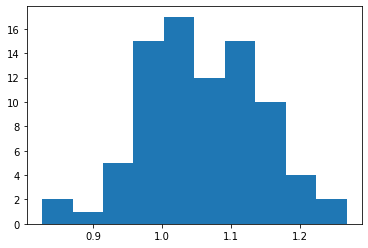

In [6]:
# AUC distrubution HGCC
plt.hist(auc["AUC_Temozolomide"])

(array([ 2.,  1.,  5., 15., 17., 12., 15., 10.,  4.,  2.]),
 array([0.55852318, 0.60267087, 0.64681855, 0.69096623, 0.73511391,
        0.77926159, 0.82340927, 0.86755696, 0.91170464, 0.95585232,
        1.        ]),
 <BarContainer object of 10 artists>)

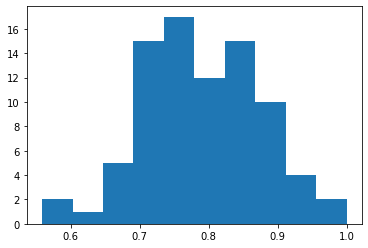

In [7]:
# normalize distribution to [0,1]
auc_correct = auc["AUC_Temozolomide"]-auc["AUC_Temozolomide"].max() +1
plt.hist(auc_correct)

In [8]:
# initialize model
def create_model(activation1 = "sigmoid",activation2="softplus",l2 = 0.001,l1=0.001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
    
    model = Sequential()
    
    model.add(Dense(1000,activation= activation1,input_shape=(17419,),kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1)))#kernel_initializer="pretrained"             
    
    model.add(Dropout(0.3))
    
    model.add(Dense(100, activation=activation2))
    #,random_uniform,Constant(value=0.005),glorot_uniform
                    
    model.add(Dropout(0.3))
    
    model.add(Dense(1, activation= activation2))
        
    model.compile(loss='mean_squared_error',optimizer = opt,metrics=['mae']) #SGD
        
    return model

In [10]:
# load weights
pre_model = create_model()
pre_model.load_weights("GDSC_TMZ_model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
auc_norm = auc_correct
auc_norm = (auc_norm - auc_norm.min())/(auc_norm.max()-auc_norm.min())
auc_norm = auc_norm*10
auc_norm = pd.DataFrame(auc_norm)

In [13]:
Robust = RobustScaler()
hgcc_norm = Robust.fit_transform(hgcc)
pred_auc = pre_model.predict(hgcc_norm)

In [14]:
spearmanr(auc_norm["AUC_Temozolomide"],pred_auc)

SpearmanrResult(correlation=-0.06053482221569203, pvalue=0.5866936383280887)

In [15]:
R2(auc_norm["AUC_Temozolomide"],pred_auc)

[1250.1521]
302.2816303782043


array([-3.1357198], dtype=float32)

(array([ 2.,  1.,  5., 15., 17., 12., 15., 10.,  4.,  2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

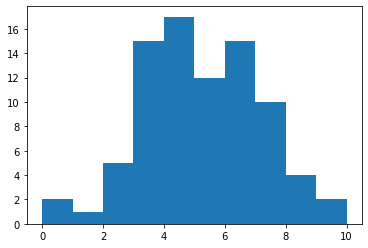

In [16]:
plt.hist(auc_norm["AUC_Temozolomide"])

In [17]:
def plt_loss(train_loss,validate_loss,fold_no):
    plt.figure(figsize=(8, 8))
    #plt.subplot(5, 1, fold_no)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validate_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [18]:
# transfer weights to initialize the new model
def create_model2(activation1 = "sigmoid",activation2 = "softplus",l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
    
    init = GlorotUniform(seed = 999)
    model = Sequential()
    
    model.add(Dense(1000,activation= activation1,input_shape=(17419,),
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    #kernel_initializer=pre_model.layers[0].get_weights()[0],
                    #bias_initializer=pre_model.layers[0].get_weights()[1])
                    weights = [pre_model.layers[0].get_weights()[0],pre_model.layers[0].get_weights()[1]])
             )            
    
    model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    
    model.add(Dense(100, activation=activation2,
                    # weights = [pre_model.layers[2].get_weights()[0],pre_model.layers[2].get_weights()[1]])
                    kernel_initializer=init)
             )
                    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation= activation2, kernel_initializer=init)
             )
        
    model.compile(loss='mse',
                  optimizer = opt,
                  metrics=['mean_absolute_error'])
        
    return model

In [19]:
# label for auc
auc_bi = list()
for i in auc_norm["AUC_Temozolomide"]:
    if i < auc_norm["AUC_Temozolomide"].median():
        auc_bi.append(0)
    else:
        auc_bi.append(1)
print(auc_bi)

[1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]


In [20]:
# partitions
train_test_index = pd.read_csv("../train_test_index_hgcc.txt", sep="[", header=None)

line = 0

train_index = [0] * 10
test_index = [0] * 10

for seed in range(0,10):
    
    train_index[seed] = [0] * 5
    test_index[seed] = [0] * 5
    
    for fold in range(0,5):
        
        # get index train
        train_index[seed][fold] = train_test_index[1][line].split()
        # string to int
        train_index[seed][fold] = [eval(i) for i in train_index[seed][fold]]
        
                # get index train
        test_index[seed][fold] = train_test_index[2][line].split()
        # string to int
        test_index[seed][fold] = [eval(i) for i in test_index[seed][fold]]
        
        line += 1

train_index

[[[0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   12,
   14,
   15,
   17,
   18,
   19,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   38,
   39,
   40,
   41,
   43,
   45,
   46,
   47,
   48,
   49,
   50,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   69,
   71,
   72,
   73,
   74,
   77,
   78,
   79,
   80,
   81],
  [0,
   1,
   2,
   3,
   5,
   7,
   11,
   13,
   14,
   15,
   16,
   17,
   19,
   20,
   22,
   23,
   25,
   26,
   27,
   28,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   50,
   51,
   52,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   80,
   81,
   82],
  [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,


In [21]:
seed_num = 999

------------------------------------------------------------------------
Training for fold 1, seed 1 ...
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 0s 8ms/sample - loss: 22.7937 - mean_absolute_error: 4.2099 - val_loss: 19.4259 - val_mean_absolute_error: 3.9178
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.5915 - mean_absolute_error: 4.0753 - val_loss: 18.8580 - val_mean_absolute_error: 3.8496
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.2492 - mean_absolute_error: 3.9205 - val_loss: 18.2890 - val_mean_absolute_error: 3.7788
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 18.8415 - mean_absolute_error: 3.7554 - val_loss: 17.6919 - val_mean_absolute_error: 3.7037
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - l

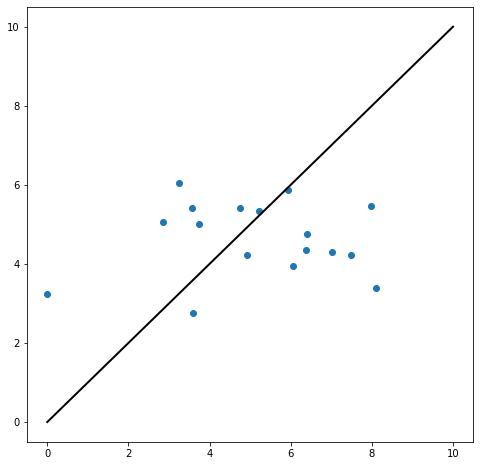

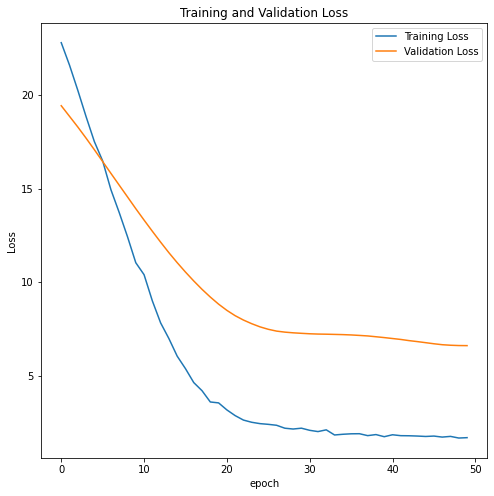

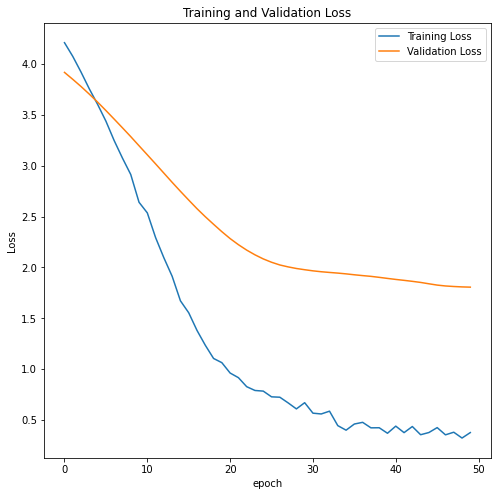

------------------------------------------------------------------------
Training for fold 2, seed 1 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 0s 8ms/sample - loss: 21.6390 - mean_absolute_error: 4.0273 - val_loss: 25.6689 - val_mean_absolute_error: 4.6176
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.4828 - mean_absolute_error: 3.8966 - val_loss: 25.0496 - val_mean_absolute_error: 4.5492
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.0960 - mean_absolute_error: 3.7451 - val_loss: 24.4078 - val_mean_absolute_error: 4.4769
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.8306 - mean_absolute_error: 3.5881 - val_loss: 23.7417 - val_mean_absolute_error: 4.4001
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.9359 - mean_absolute_error: 3.4602 - val_loss: 23.0504 - val_mean_absolute_error: 4.3196
Epoch 6/50
52/52 [===

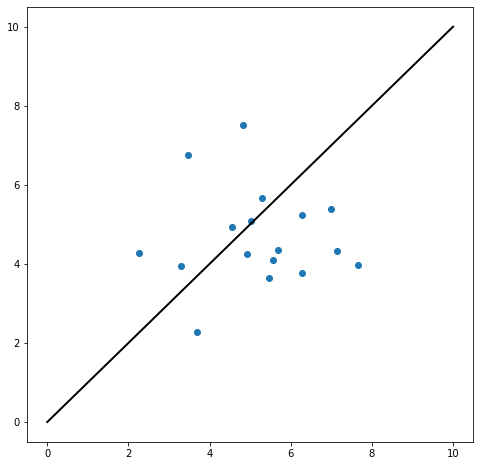

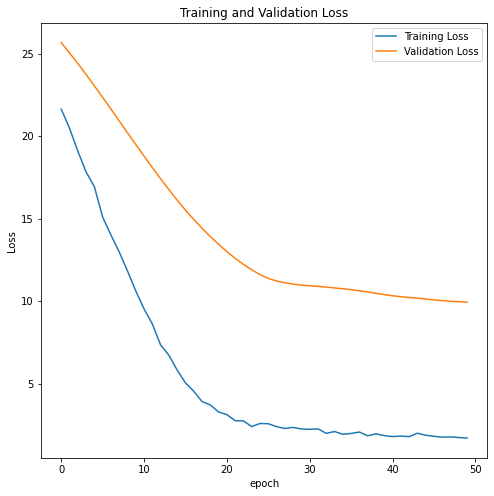

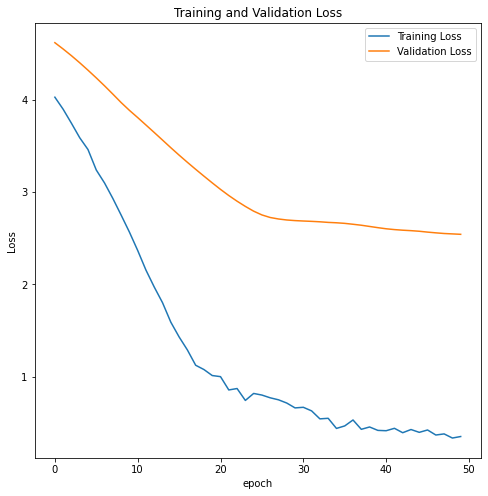

------------------------------------------------------------------------
Training for fold 3, seed 1 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 0s 9ms/sample - loss: 21.0242 - mean_absolute_error: 4.0362 - val_loss: 26.1671 - val_mean_absolute_error: 4.6900
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.6296 - mean_absolute_error: 3.8751 - val_loss: 25.5024 - val_mean_absolute_error: 4.6198
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.5226 - mean_absolute_error: 3.7483 - val_loss: 24.8319 - val_mean_absolute_error: 4.5473
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.0033 - mean_absolute_error: 3.5605 - val_loss: 24.1197 - val_mean_absolute_error: 4.4696
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.1001 - mean_absolute_error: 3.4336 - val_loss: 23.3850 - val_mean_absolute_error: 4.3880
Epoch 6/50
52/52 [===

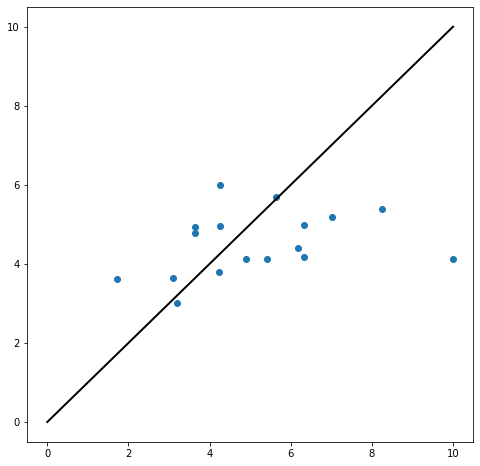

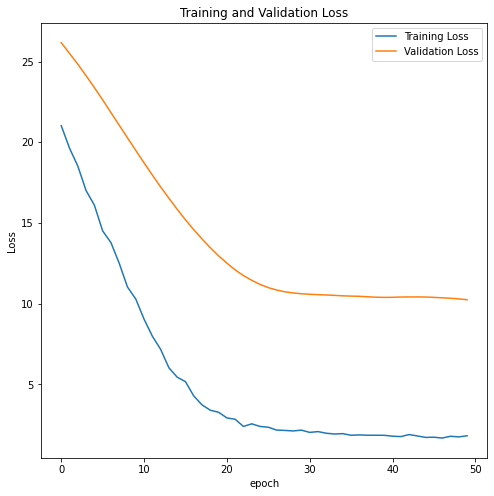

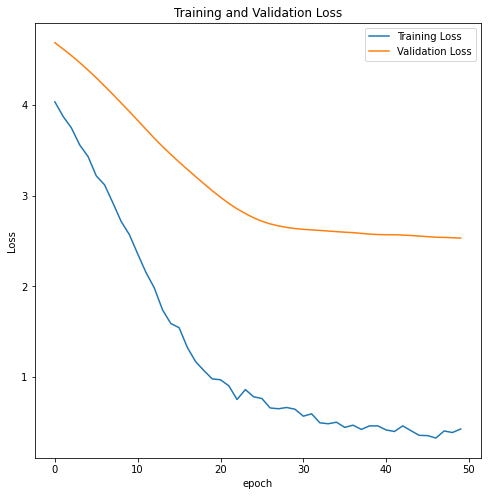

------------------------------------------------------------------------
Training for fold 4, seed 1 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 0s 9ms/sample - loss: 21.9963 - mean_absolute_error: 4.1339 - val_loss: 24.1046 - val_mean_absolute_error: 4.4284
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.5932 - mean_absolute_error: 3.9731 - val_loss: 23.5279 - val_mean_absolute_error: 4.3635
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.5547 - mean_absolute_error: 3.8440 - val_loss: 22.9334 - val_mean_absolute_error: 4.2958
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.9326 - mean_absolute_error: 3.6565 - val_loss: 22.3144 - val_mean_absolute_error: 4.2237
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.8242 - mean_absolute_error: 3.5210 - val_loss: 21.6740 - val_mean_absolute_error: 4.1486
Epoch 6/50
53/53 [===

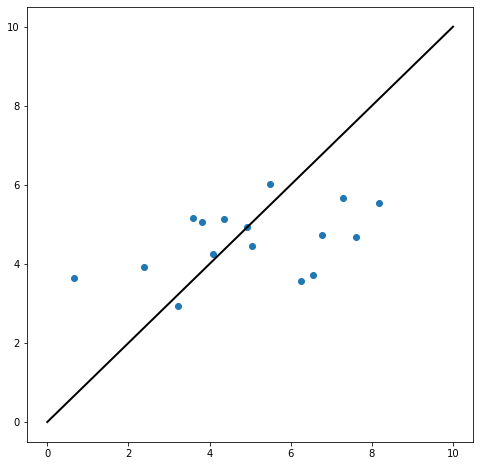

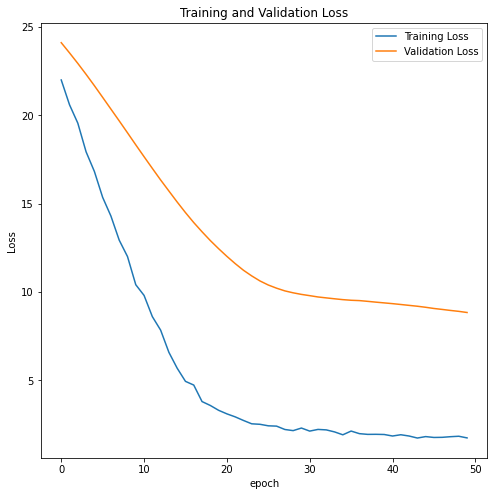

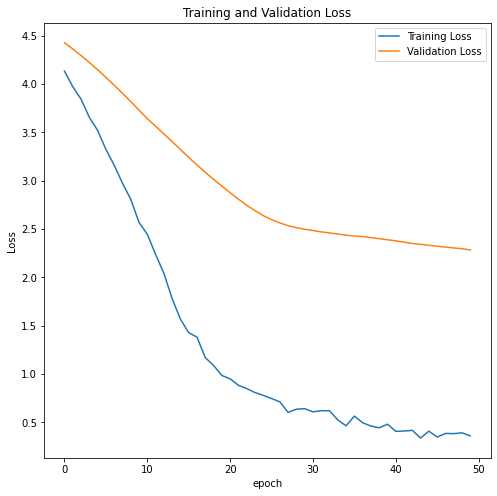

------------------------------------------------------------------------
Training for fold 5, seed 1 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 10ms/sample - loss: 20.7059 - mean_absolute_error: 3.9585 - val_loss: 24.7541 - val_mean_absolute_error: 4.6544
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.3746 - mean_absolute_error: 3.8151 - val_loss: 24.1839 - val_mean_absolute_error: 4.5943
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.4526 - mean_absolute_error: 3.6942 - val_loss: 23.5979 - val_mean_absolute_error: 4.5315
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.0988 - mean_absolute_error: 3.5331 - val_loss: 22.9913 - val_mean_absolute_error: 4.4656
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 15.9475 - mean_absolute_error: 3.3830 - val_loss: 22.3564 - val_mean_absolute_error: 4.3954
Epoch 6/50
53/53 [==

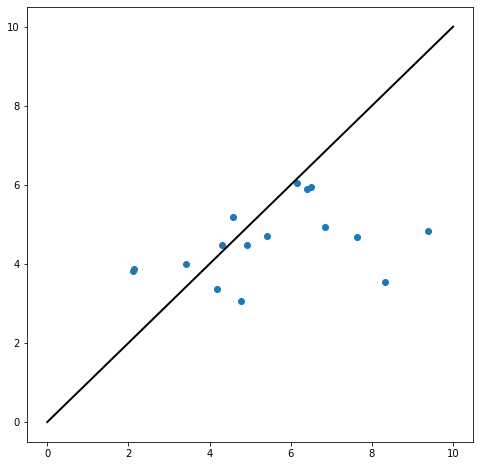

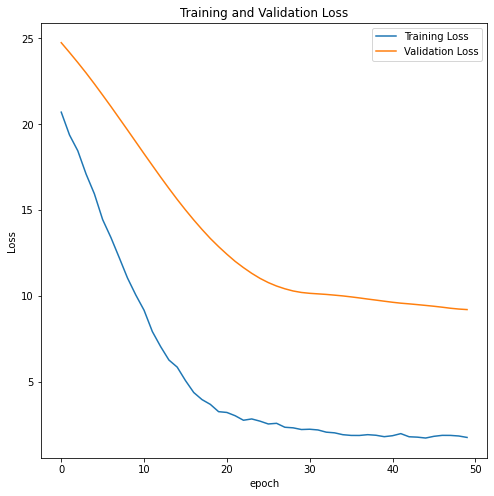

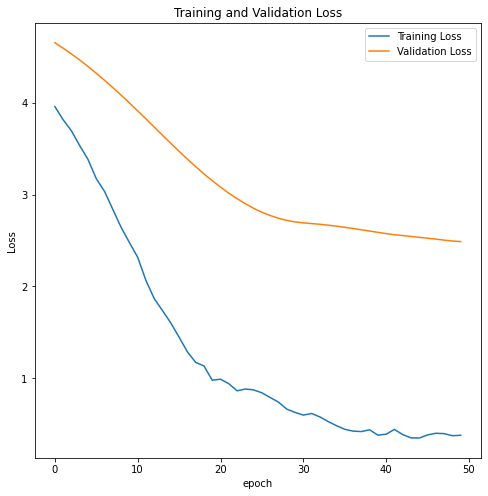

Overall spearman correlation: 0.219
------------------------------------------------------------------------
Training for fold 1, seed 2 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 10ms/sample - loss: 22.4371 - mean_absolute_error: 4.1485 - val_loss: 22.1094 - val_mean_absolute_error: 4.3155
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.3050 - mean_absolute_error: 4.0159 - val_loss: 21.5316 - val_mean_absolute_error: 4.2503
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.8693 - mean_absolute_error: 3.8516 - val_loss: 20.9310 - val_mean_absolute_error: 4.1815
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.4185 - mean_absolute_error: 3.6893 - val_loss: 20.3134 - val_mean_absolute_error: 4.1091
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.2708 - mean_absolute_error: 3.5434 - val_loss: 19.6856 - val_mean_absolut

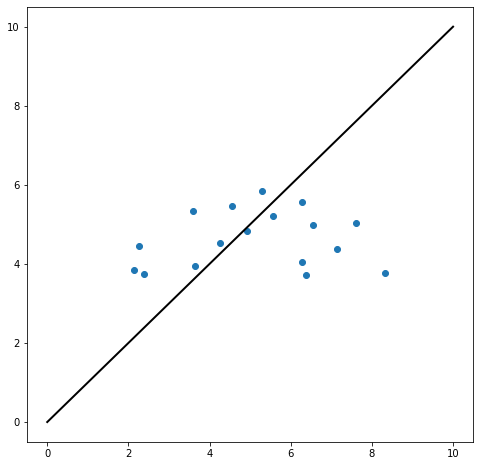

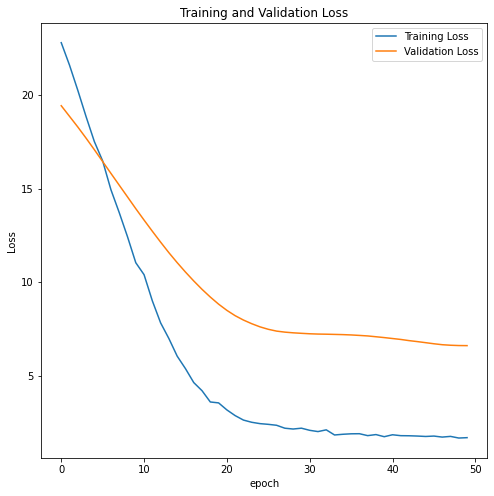

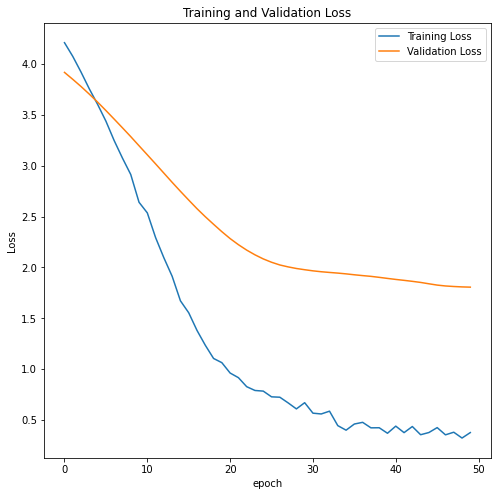

------------------------------------------------------------------------
Training for fold 2, seed 2 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 11ms/sample - loss: 21.9796 - mean_absolute_error: 4.0934 - val_loss: 23.8772 - val_mean_absolute_error: 4.4016
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.7352 - mean_absolute_error: 3.9522 - val_loss: 23.2994 - val_mean_absolute_error: 4.3381
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.5777 - mean_absolute_error: 3.8114 - val_loss: 22.7070 - val_mean_absolute_error: 4.2723
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.8164 - mean_absolute_error: 3.6108 - val_loss: 22.1060 - val_mean_absolute_error: 4.2035
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.9238 - mean_absolute_error: 3.4942 - val_loss: 21.4818 - val_mean_absolute_error: 4.1314
Epoch 6/50
52/52 [==

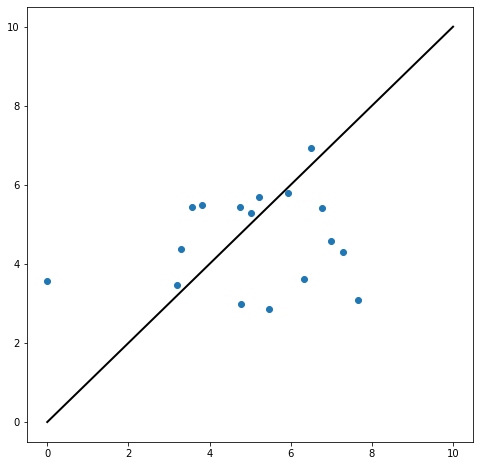

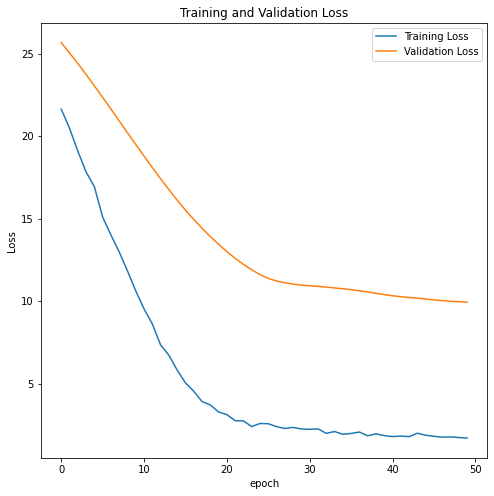

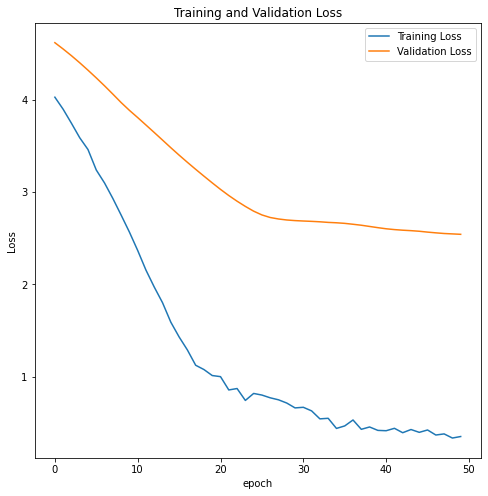

------------------------------------------------------------------------
Training for fold 3, seed 2 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 10ms/sample - loss: 20.4618 - mean_absolute_error: 3.9648 - val_loss: 26.4941 - val_mean_absolute_error: 4.7436
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.0873 - mean_absolute_error: 3.7988 - val_loss: 25.8117 - val_mean_absolute_error: 4.6707
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 18.0053 - mean_absolute_error: 3.6676 - val_loss: 25.1227 - val_mean_absolute_error: 4.5956
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.6993 - mean_absolute_error: 3.5128 - val_loss: 24.4141 - val_mean_absolute_error: 4.5171
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 15.5842 - mean_absolute_error: 3.3615 - val_loss: 23.7042 - val_mean_absolute_error: 4.4372
Epoch 6/50
52/52 [==

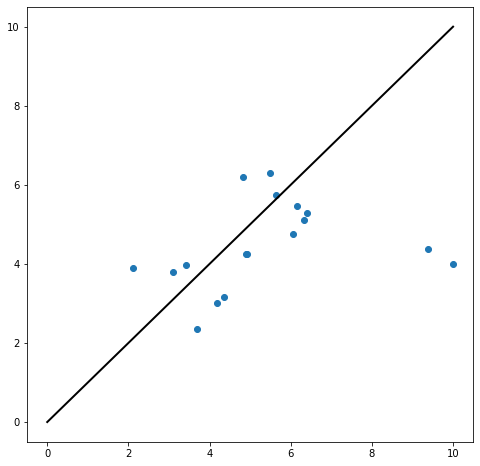

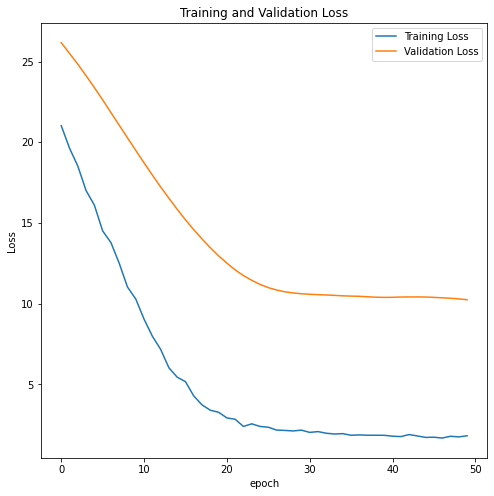

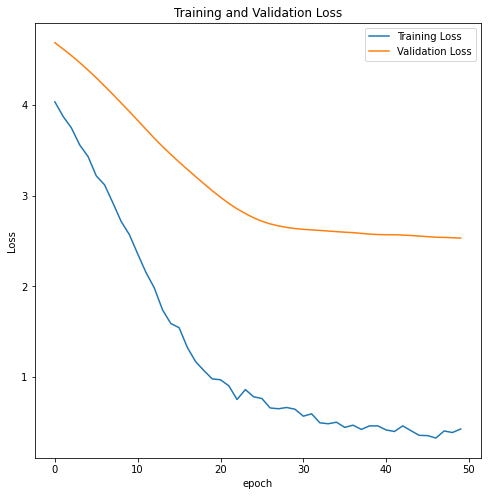

------------------------------------------------------------------------
Training for fold 4, seed 2 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 11ms/sample - loss: 21.6438 - mean_absolute_error: 4.1145 - val_loss: 22.5014 - val_mean_absolute_error: 4.3247
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.2538 - mean_absolute_error: 3.9512 - val_loss: 21.9008 - val_mean_absolute_error: 4.2552
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.9533 - mean_absolute_error: 3.7961 - val_loss: 21.2683 - val_mean_absolute_error: 4.1808
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.7358 - mean_absolute_error: 3.6570 - val_loss: 20.6013 - val_mean_absolute_error: 4.1018
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.3886 - mean_absolute_error: 3.4843 - val_loss: 19.9166 - val_mean_absolute_error: 4.0188
Epoch 6/50
53/53 [==

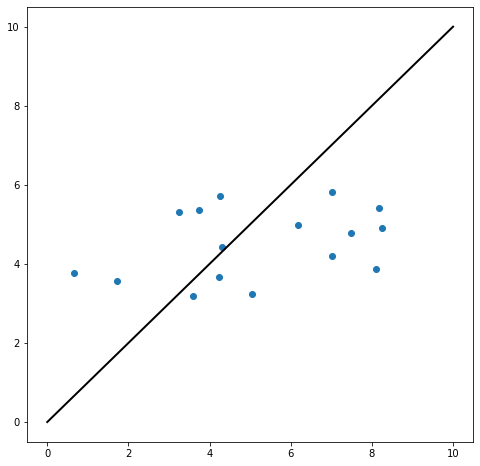

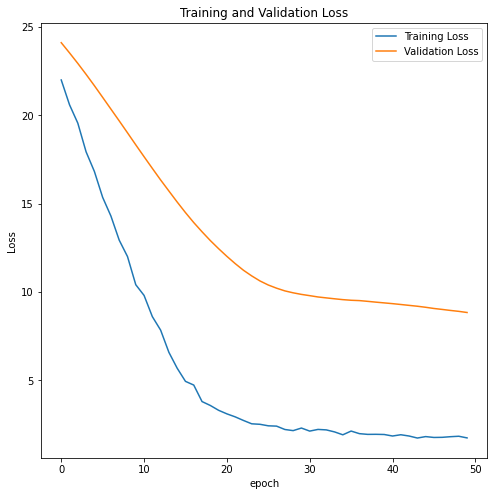

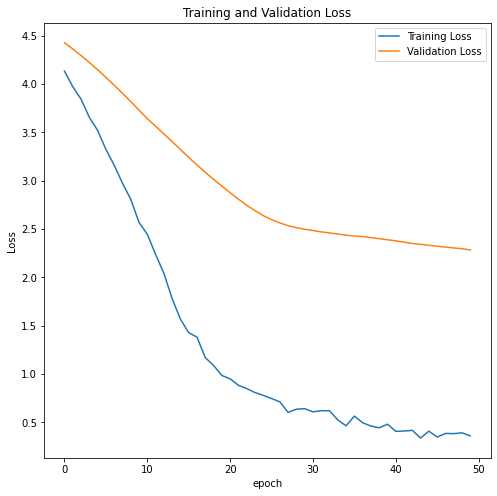

------------------------------------------------------------------------
Training for fold 5, seed 2 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 11ms/sample - loss: 21.7033 - mean_absolute_error: 4.0596 - val_loss: 25.5886 - val_mean_absolute_error: 4.5939
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.4466 - mean_absolute_error: 3.9162 - val_loss: 25.0075 - val_mean_absolute_error: 4.5306
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.0099 - mean_absolute_error: 3.7537 - val_loss: 24.3871 - val_mean_absolute_error: 4.4626
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.9801 - mean_absolute_error: 3.6300 - val_loss: 23.7558 - val_mean_absolute_error: 4.3923
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.6780 - mean_absolute_error: 3.4537 - val_loss: 23.0873 - val_mean_absolute_error: 4.3166
Epoch 6/50
53/53 [==

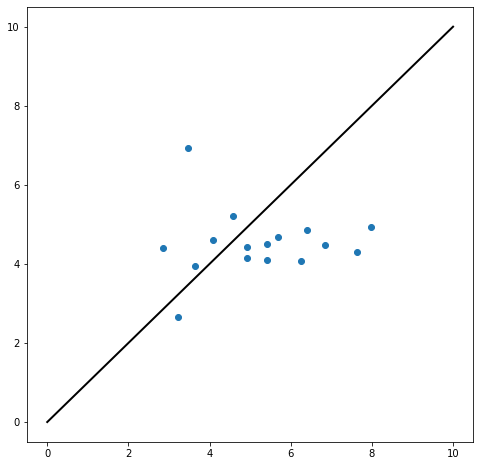

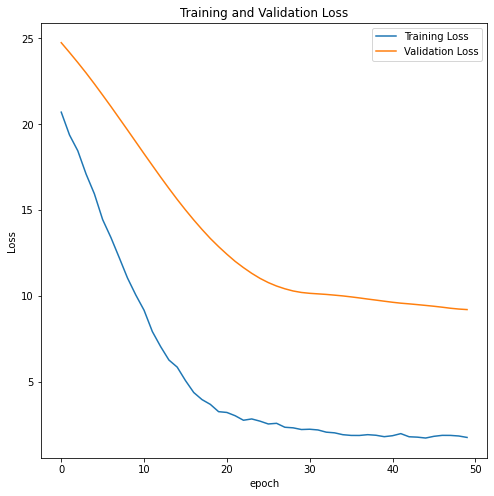

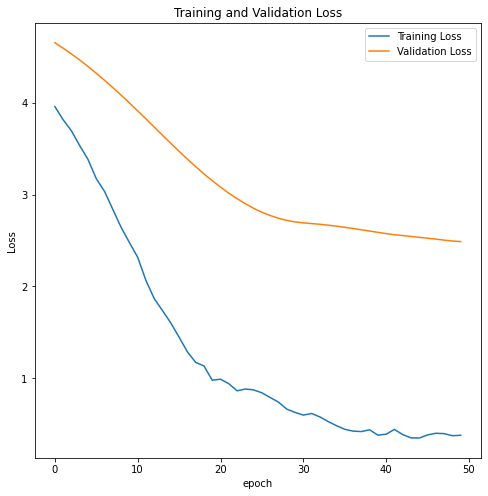

Overall spearman correlation: 0.223
------------------------------------------------------------------------
Training for fold 1, seed 3 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 12ms/sample - loss: 21.0790 - mean_absolute_error: 4.0487 - val_loss: 25.2380 - val_mean_absolute_error: 4.5608
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.8276 - mean_absolute_error: 3.9060 - val_loss: 24.7103 - val_mean_absolute_error: 4.5033
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.4715 - mean_absolute_error: 3.7435 - val_loss: 24.1503 - val_mean_absolute_error: 4.4419
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.3802 - mean_absolute_error: 3.6183 - val_loss: 23.5823 - val_mean_absolute_error: 4.3786
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 15.8501 - mean_absolute_error: 3.4195 - val_loss: 22.9745 - val_mean_absolut

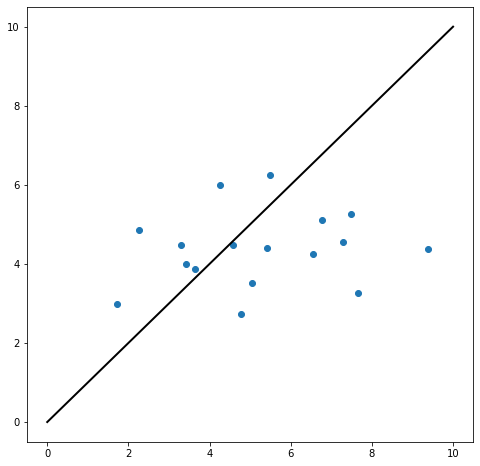

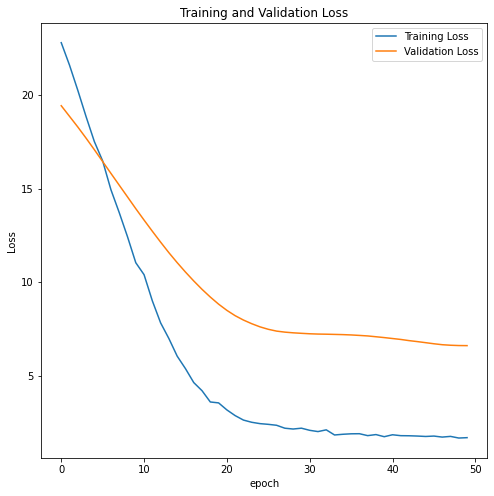

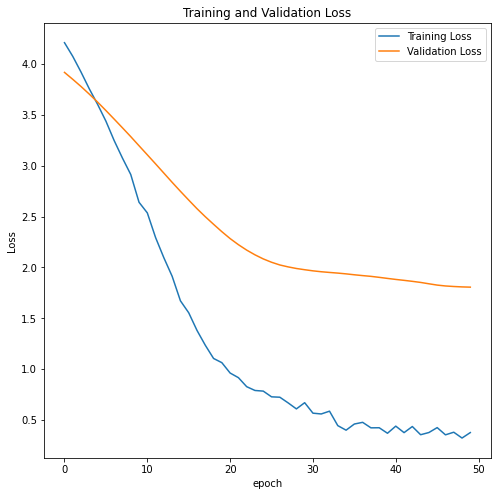

------------------------------------------------------------------------
Training for fold 2, seed 3 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 12ms/sample - loss: 22.5166 - mean_absolute_error: 4.1261 - val_loss: 20.6589 - val_mean_absolute_error: 4.0649
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.9934 - mean_absolute_error: 3.9620 - val_loss: 20.0691 - val_mean_absolute_error: 3.9930
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.0519 - mean_absolute_error: 3.8501 - val_loss: 19.4517 - val_mean_absolute_error: 3.9167
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.5794 - mean_absolute_error: 3.6811 - val_loss: 18.8136 - val_mean_absolute_error: 3.8365
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.5391 - mean_absolute_error: 3.5518 - val_loss: 18.1646 - val_mean_absolute_error: 3.7524
Epoch 6/50
52/52 [==

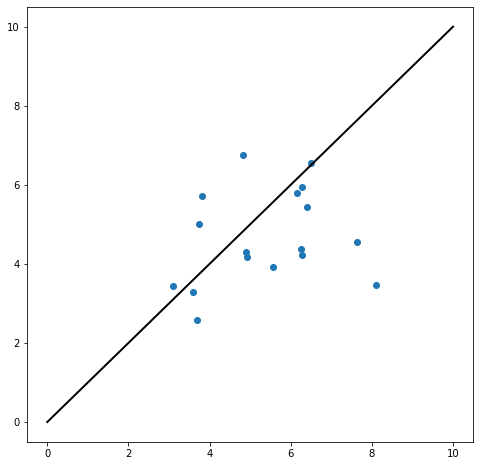

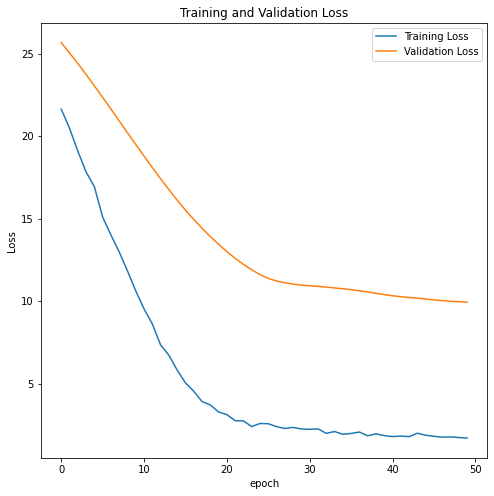

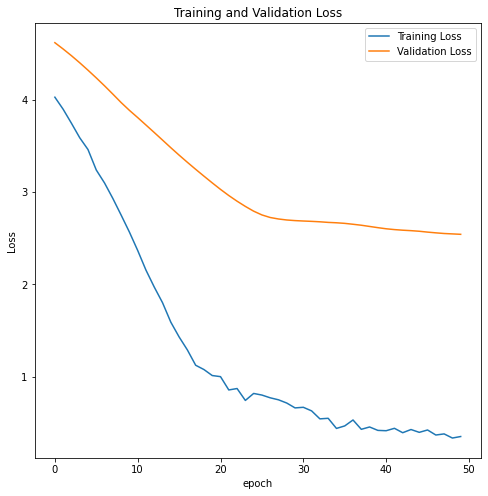

------------------------------------------------------------------------
Training for fold 3, seed 3 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 13ms/sample - loss: 21.2775 - mean_absolute_error: 4.0571 - val_loss: 25.0953 - val_mean_absolute_error: 4.5571
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.8027 - mean_absolute_error: 3.8909 - val_loss: 24.4707 - val_mean_absolute_error: 4.4890
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.8716 - mean_absolute_error: 3.7710 - val_loss: 23.8334 - val_mean_absolute_error: 4.4191
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.6226 - mean_absolute_error: 3.6214 - val_loss: 23.1651 - val_mean_absolute_error: 4.3454
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.1473 - mean_absolute_error: 3.4247 - val_loss: 22.4742 - val_mean_absolute_error: 4.2678
Epoch 6/50
52/52 [==

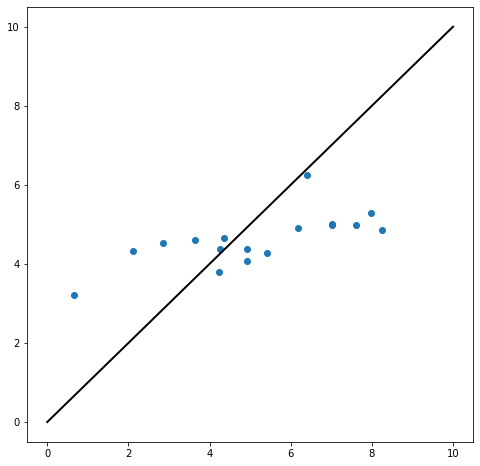

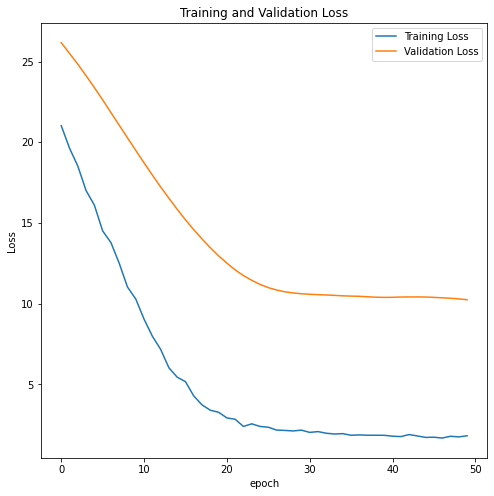

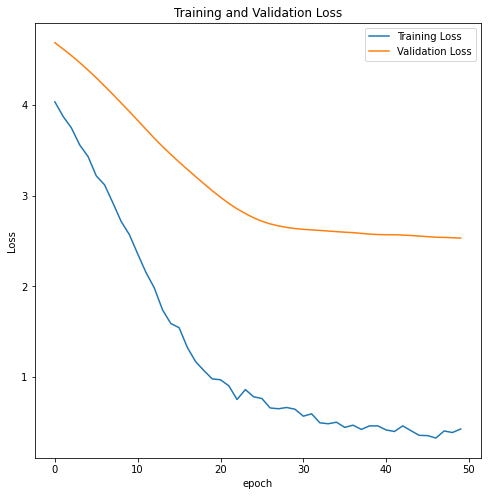

------------------------------------------------------------------------
Training for fold 4, seed 3 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 13ms/sample - loss: 22.8774 - mean_absolute_error: 4.2119 - val_loss: 21.6979 - val_mean_absolute_error: 4.2148
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 21.5088 - mean_absolute_error: 4.0571 - val_loss: 21.1392 - val_mean_absolute_error: 4.1516
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.3198 - mean_absolute_error: 3.9245 - val_loss: 20.5725 - val_mean_absolute_error: 4.0865
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.9695 - mean_absolute_error: 3.7595 - val_loss: 19.9851 - val_mean_absolute_error: 4.0179
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.4859 - mean_absolute_error: 3.5829 - val_loss: 19.3758 - val_mean_absolute_error: 3.9456
Epoch 6/50
53/53 [==

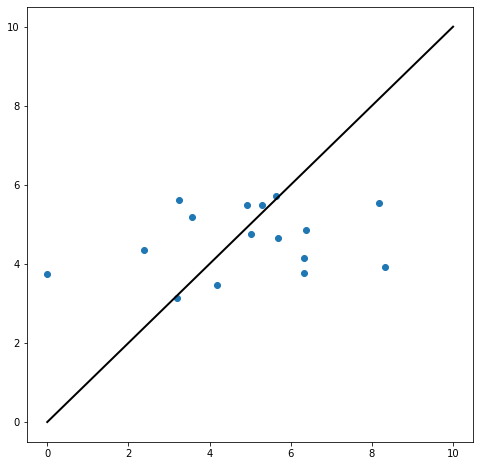

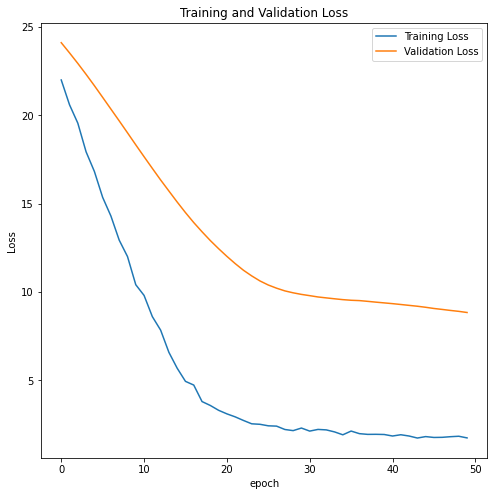

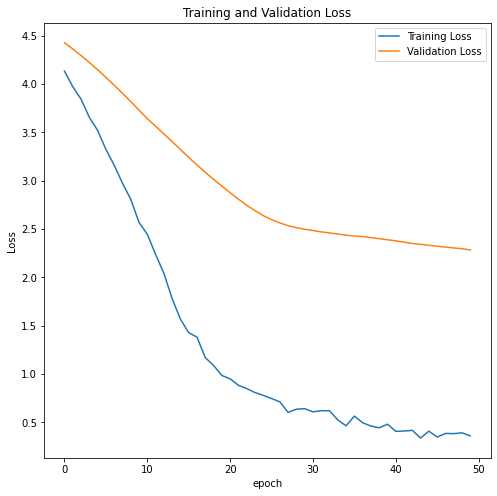

------------------------------------------------------------------------
Training for fold 5, seed 3 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 13ms/sample - loss: 20.6857 - mean_absolute_error: 3.9552 - val_loss: 27.5716 - val_mean_absolute_error: 4.9281
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.4557 - mean_absolute_error: 3.8115 - val_loss: 26.8818 - val_mean_absolute_error: 4.8574
Epoch 3/50
53/53 [==============================] - 0s 5ms/sample - loss: 18.1318 - mean_absolute_error: 3.6618 - val_loss: 26.1544 - val_mean_absolute_error: 4.7816
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.9570 - mean_absolute_error: 3.5099 - val_loss: 25.3903 - val_mean_absolute_error: 4.7006
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 15.7321 - mean_absolute_error: 3.3536 - val_loss: 24.6207 - val_mean_absolute_error: 4.6173
Epoch 6/50
53/53 [==

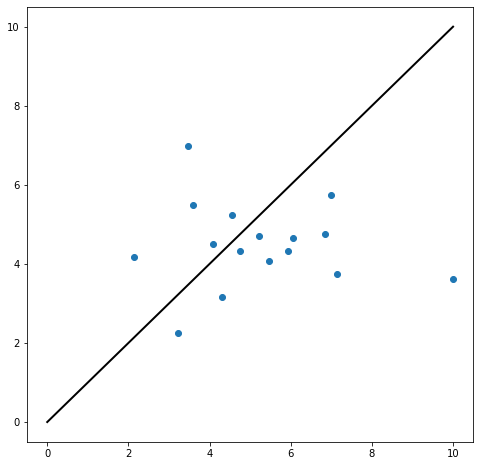

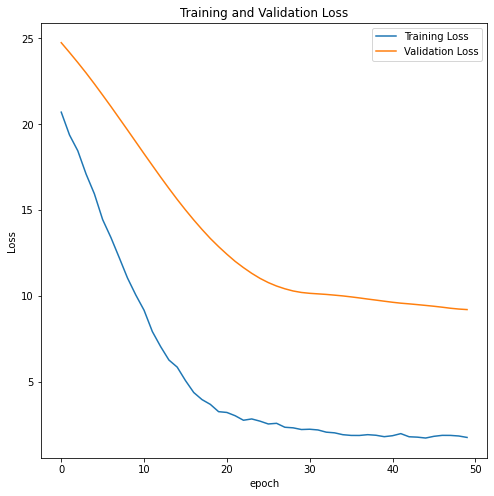

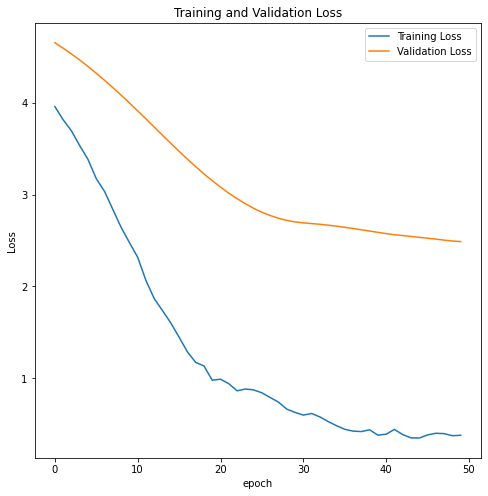

Overall spearman correlation: 0.236
------------------------------------------------------------------------
Training for fold 1, seed 4 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 14ms/sample - loss: 22.3566 - mean_absolute_error: 4.1447 - val_loss: 21.0915 - val_mean_absolute_error: 4.1178
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.0043 - mean_absolute_error: 3.9950 - val_loss: 20.5363 - val_mean_absolute_error: 4.0512
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.8179 - mean_absolute_error: 3.8629 - val_loss: 19.9588 - val_mean_absolute_error: 3.9807
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.8349 - mean_absolute_error: 3.7331 - val_loss: 19.3580 - val_mean_absolute_error: 3.9064
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.1721 - mean_absolute_error: 3.5328 - val_loss: 18.7376 - val_mean_absolut

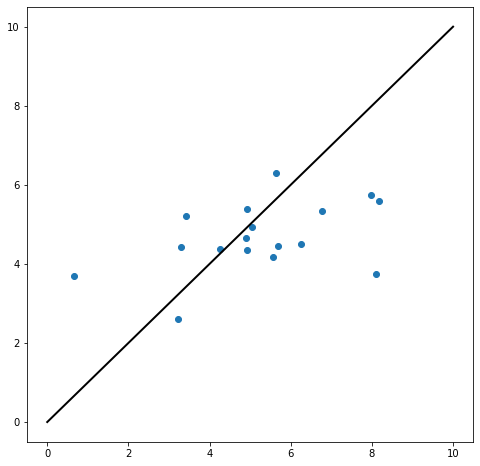

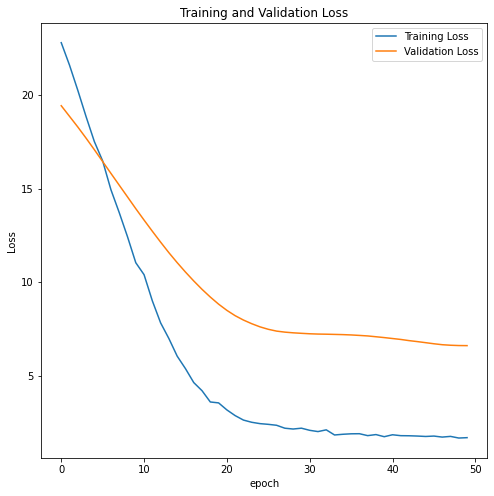

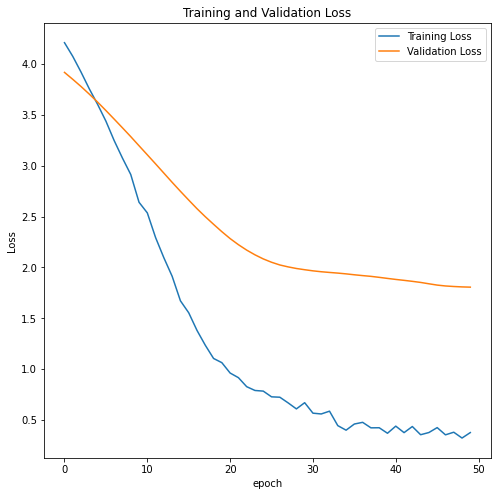

------------------------------------------------------------------------
Training for fold 2, seed 4 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 14ms/sample - loss: 21.2453 - mean_absolute_error: 3.9908 - val_loss: 23.1876 - val_mean_absolute_error: 4.4020
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.9700 - mean_absolute_error: 3.8389 - val_loss: 22.6213 - val_mean_absolute_error: 4.3366
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.3358 - mean_absolute_error: 3.6474 - val_loss: 22.0295 - val_mean_absolute_error: 4.2669
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.6410 - mean_absolute_error: 3.5508 - val_loss: 21.4251 - val_mean_absolute_error: 4.1945
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.3275 - mean_absolute_error: 3.3916 - val_loss: 20.8180 - val_mean_absolute_error: 4.1196
Epoch 6/50
52/52 [==

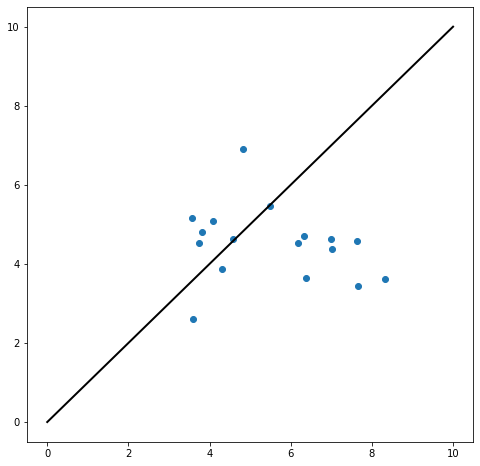

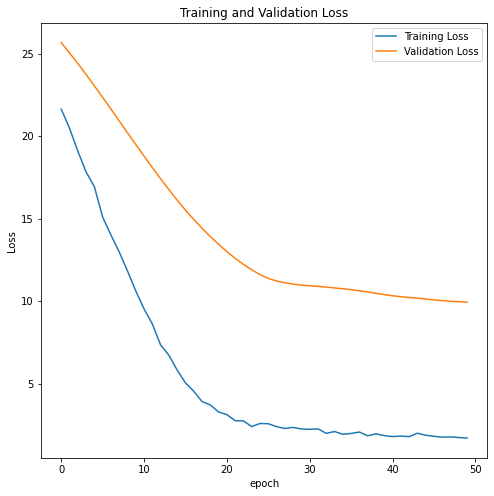

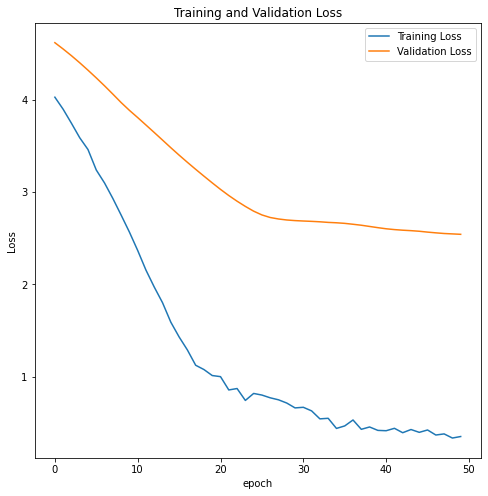

------------------------------------------------------------------------
Training for fold 3, seed 4 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 15ms/sample - loss: 21.6319 - mean_absolute_error: 4.1039 - val_loss: 25.8100 - val_mean_absolute_error: 4.7244
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.1326 - mean_absolute_error: 3.9290 - val_loss: 25.1910 - val_mean_absolute_error: 4.6612
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.8949 - mean_absolute_error: 3.8018 - val_loss: 24.5377 - val_mean_absolute_error: 4.5933
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 17.8350 - mean_absolute_error: 3.6741 - val_loss: 23.8547 - val_mean_absolute_error: 4.5213
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.4440 - mean_absolute_error: 3.4903 - val_loss: 23.1675 - val_mean_absolute_error: 4.4470
Epoch 6/50
52/52 [==

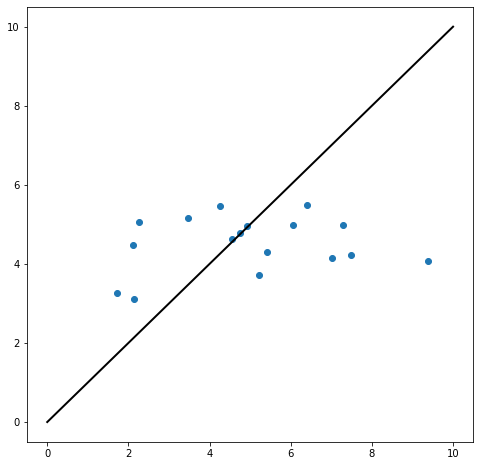

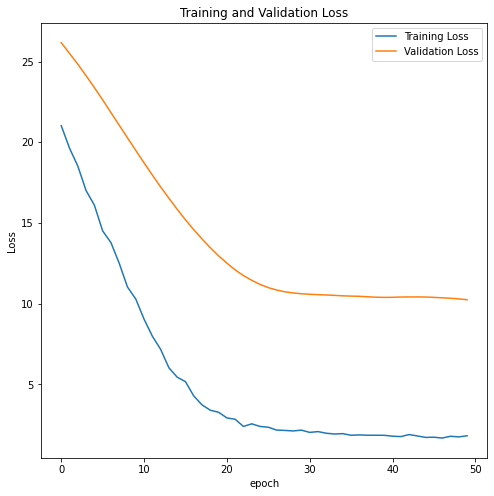

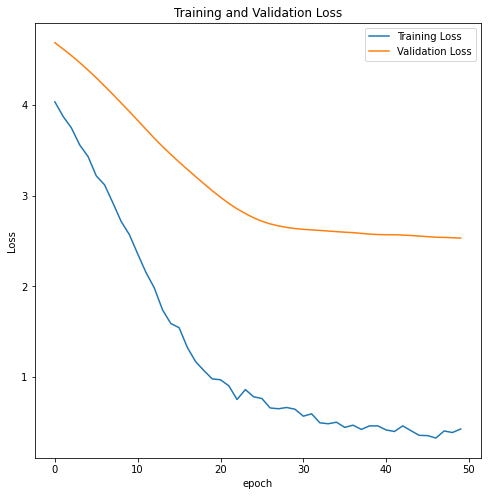

------------------------------------------------------------------------
Training for fold 4, seed 4 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 15ms/sample - loss: 21.9453 - mean_absolute_error: 4.1120 - val_loss: 25.5924 - val_mean_absolute_error: 4.6109
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.6223 - mean_absolute_error: 3.9589 - val_loss: 24.9048 - val_mean_absolute_error: 4.5369
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.7634 - mean_absolute_error: 3.8556 - val_loss: 24.2227 - val_mean_absolute_error: 4.4618
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.3536 - mean_absolute_error: 3.7016 - val_loss: 23.5054 - val_mean_absolute_error: 4.3818
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.1060 - mean_absolute_error: 3.5360 - val_loss: 22.7537 - val_mean_absolute_error: 4.2962
Epoch 6/50
53/53 [==

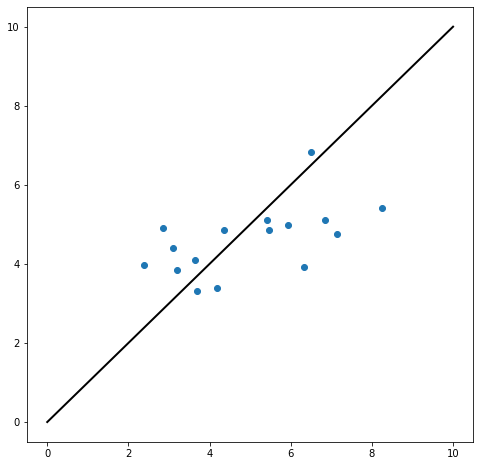

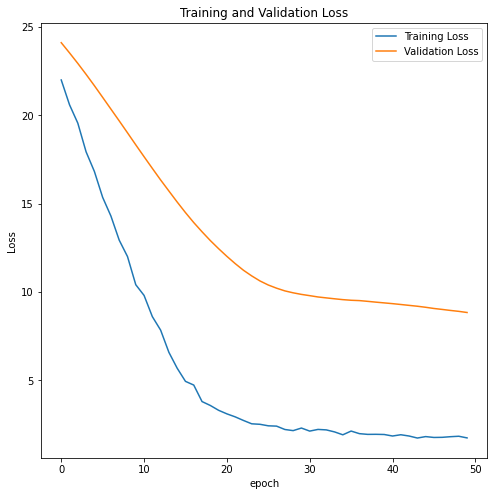

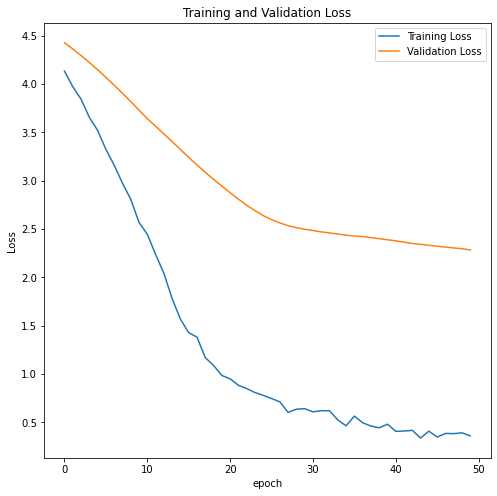

------------------------------------------------------------------------
Training for fold 5, seed 4 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 15ms/sample - loss: 20.9733 - mean_absolute_error: 4.0024 - val_loss: 25.0322 - val_mean_absolute_error: 4.5529
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.9830 - mean_absolute_error: 3.8881 - val_loss: 24.4369 - val_mean_absolute_error: 4.4859
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.5889 - mean_absolute_error: 3.7189 - val_loss: 23.7953 - val_mean_absolute_error: 4.4132
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.0593 - mean_absolute_error: 3.5386 - val_loss: 23.1550 - val_mean_absolute_error: 4.3388
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 15.8839 - mean_absolute_error: 3.3816 - val_loss: 22.4886 - val_mean_absolute_error: 4.2602
Epoch 6/50
53/53 [==

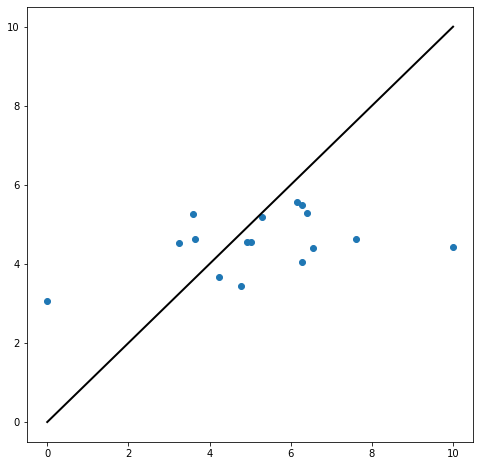

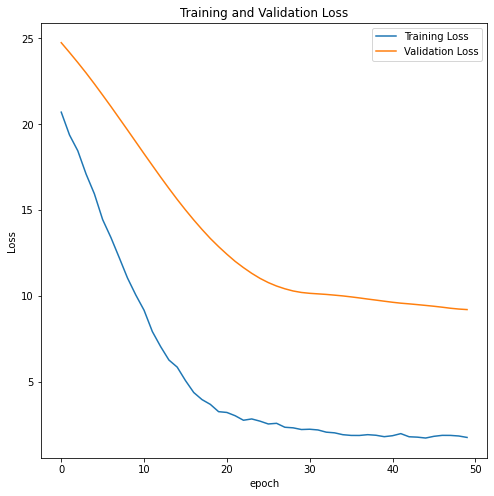

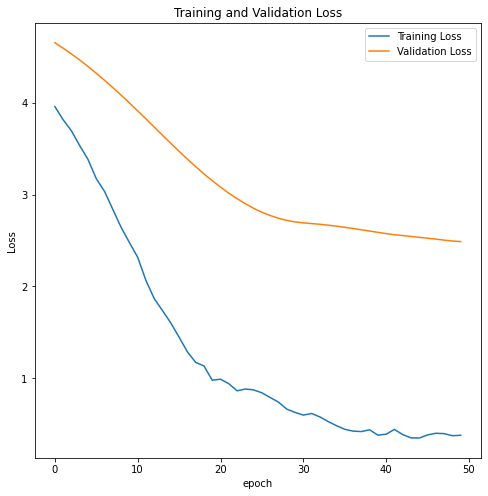

Overall spearman correlation: 0.218
------------------------------------------------------------------------
Training for fold 1, seed 5 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 16ms/sample - loss: 22.2539 - mean_absolute_error: 4.1091 - val_loss: 26.0489 - val_mean_absolute_error: 4.7045
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.9311 - mean_absolute_error: 3.9589 - val_loss: 25.4333 - val_mean_absolute_error: 4.6383
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.8721 - mean_absolute_error: 3.8288 - val_loss: 24.7977 - val_mean_absolute_error: 4.5690
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 18.5283 - mean_absolute_error: 3.6746 - val_loss: 24.1296 - val_mean_absolute_error: 4.4946
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.9827 - mean_absolute_error: 3.4738 - val_loss: 23.4383 - val_mean_absolut

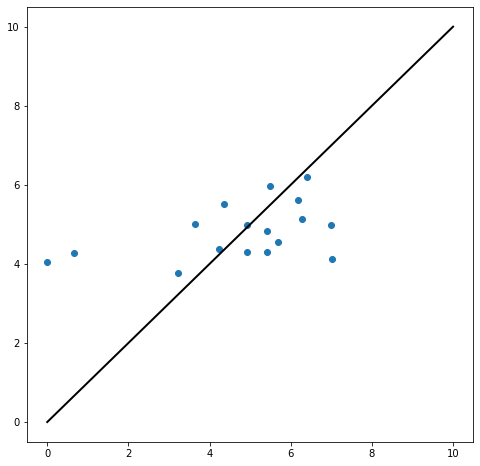

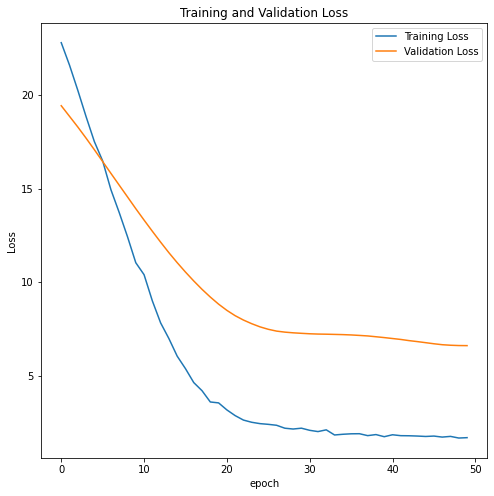

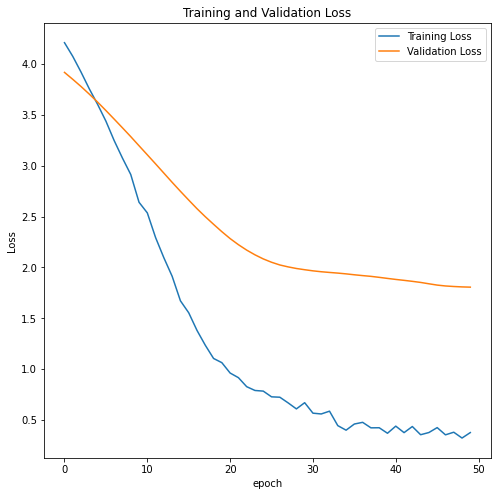

------------------------------------------------------------------------
Training for fold 2, seed 5 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 16ms/sample - loss: 20.2740 - mean_absolute_error: 3.9763 - val_loss: 25.8738 - val_mean_absolute_error: 4.6480
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.9921 - mean_absolute_error: 3.8281 - val_loss: 25.1941 - val_mean_absolute_error: 4.5754
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.8077 - mean_absolute_error: 3.6820 - val_loss: 24.4814 - val_mean_absolute_error: 4.4982
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.4973 - mean_absolute_error: 3.5323 - val_loss: 23.7608 - val_mean_absolute_error: 4.4183
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 15.2146 - mean_absolute_error: 3.3654 - val_loss: 23.0046 - val_mean_absolute_error: 4.3335
Epoch 6/50
52/52 [==

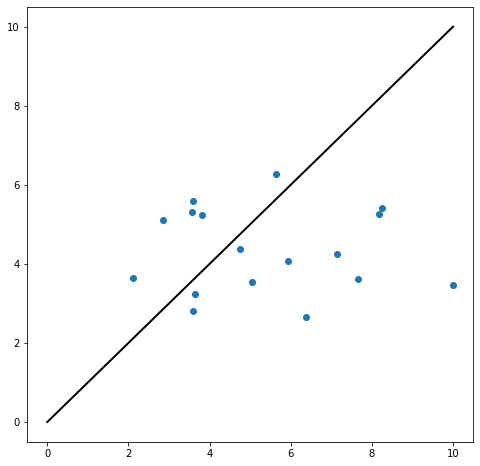

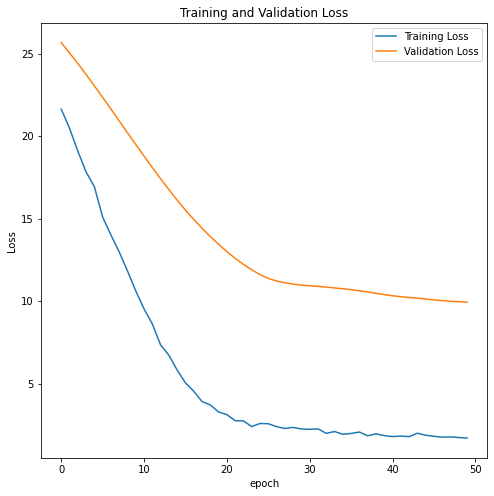

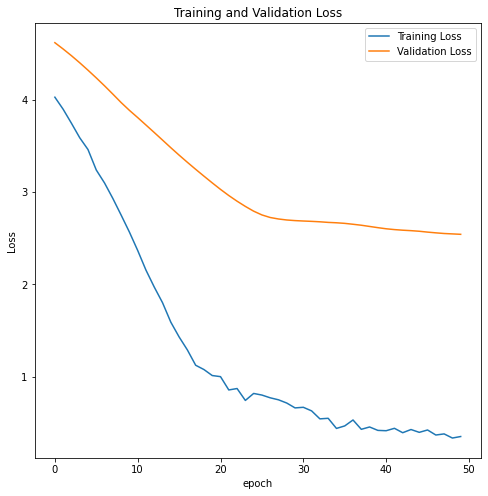

------------------------------------------------------------------------
Training for fold 3, seed 5 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 16ms/sample - loss: 22.2906 - mean_absolute_error: 4.1897 - val_loss: 24.6518 - val_mean_absolute_error: 4.5546
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.1743 - mean_absolute_error: 4.0624 - val_loss: 24.0024 - val_mean_absolute_error: 4.4834
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.8623 - mean_absolute_error: 3.9213 - val_loss: 23.3585 - val_mean_absolute_error: 4.4130
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.3084 - mean_absolute_error: 3.7320 - val_loss: 22.6783 - val_mean_absolute_error: 4.3372
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.2055 - mean_absolute_error: 3.5805 - val_loss: 21.9720 - val_mean_absolute_error: 4.2575
Epoch 6/50
52/52 [==

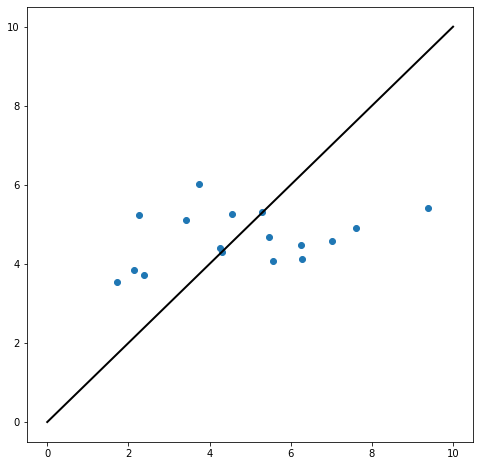

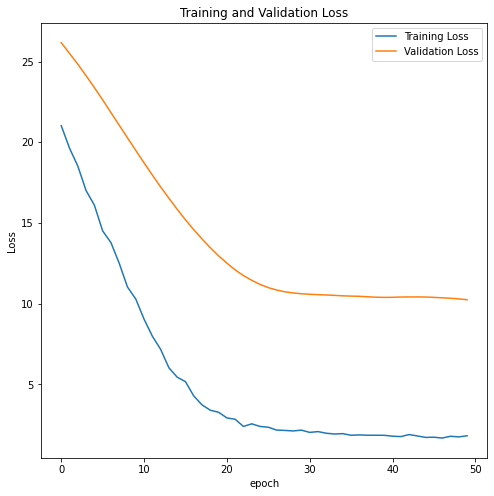

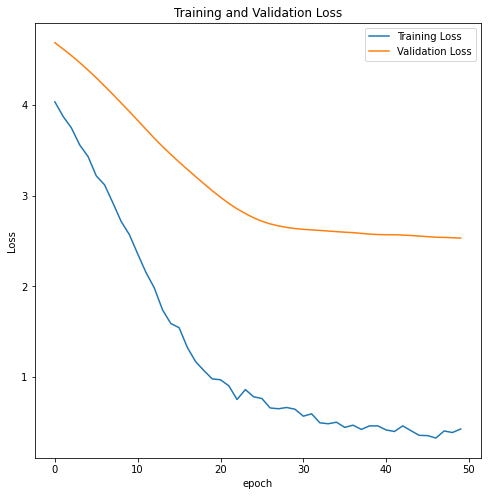

------------------------------------------------------------------------
Training for fold 4, seed 5 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 16ms/sample - loss: 22.4891 - mean_absolute_error: 4.1381 - val_loss: 22.4934 - val_mean_absolute_error: 4.2243
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 21.1602 - mean_absolute_error: 3.9953 - val_loss: 21.9136 - val_mean_absolute_error: 4.1579
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.9909 - mean_absolute_error: 3.8511 - val_loss: 21.2728 - val_mean_absolute_error: 4.0839
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.8266 - mean_absolute_error: 3.7202 - val_loss: 20.6113 - val_mean_absolute_error: 4.0055
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.4219 - mean_absolute_error: 3.5510 - val_loss: 19.9373 - val_mean_absolute_error: 3.9245
Epoch 6/50
53/53 [==

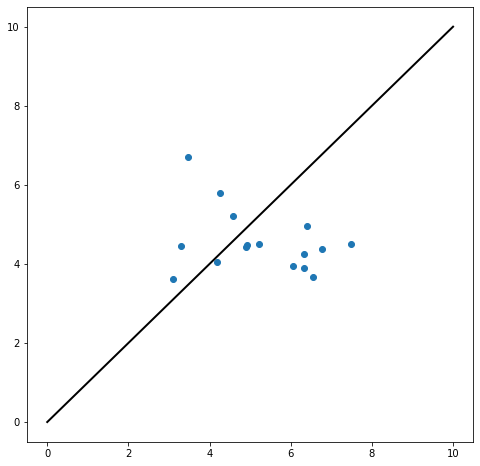

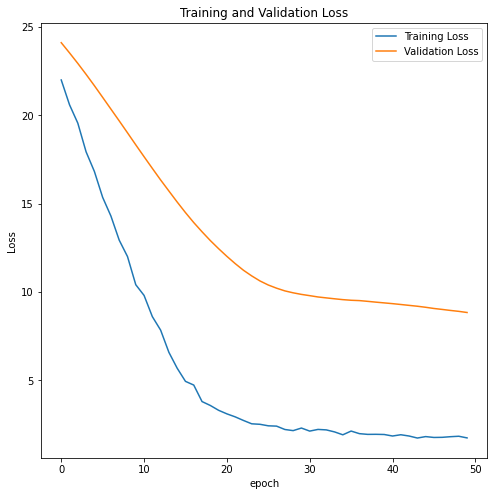

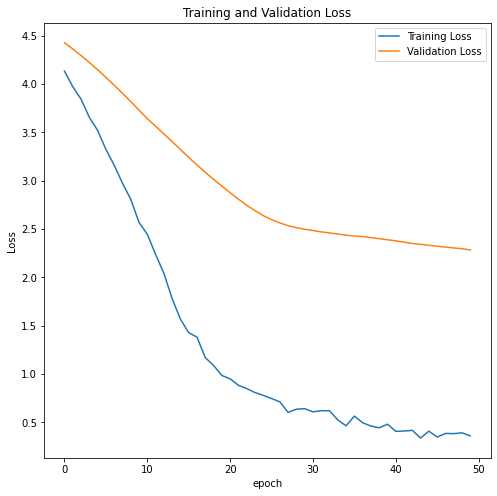

------------------------------------------------------------------------
Training for fold 5, seed 5 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 17ms/sample - loss: 20.8270 - mean_absolute_error: 3.9446 - val_loss: 21.7106 - val_mean_absolute_error: 4.2834
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.4983 - mean_absolute_error: 3.8001 - val_loss: 21.1584 - val_mean_absolute_error: 4.2173
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.4320 - mean_absolute_error: 3.6591 - val_loss: 20.5845 - val_mean_absolute_error: 4.1477
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.2700 - mean_absolute_error: 3.5219 - val_loss: 19.9895 - val_mean_absolute_error: 4.0746
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.0765 - mean_absolute_error: 3.3628 - val_loss: 19.3816 - val_mean_absolute_error: 3.9990
Epoch 6/50
53/53 [==

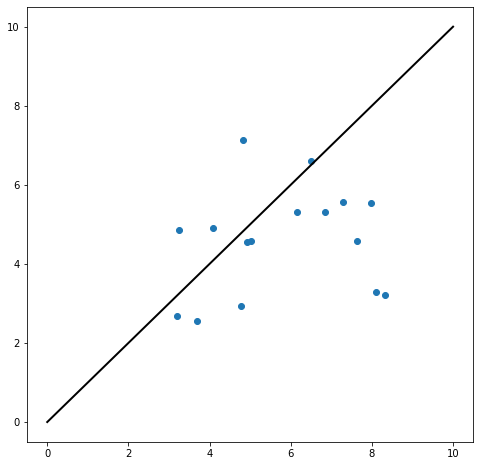

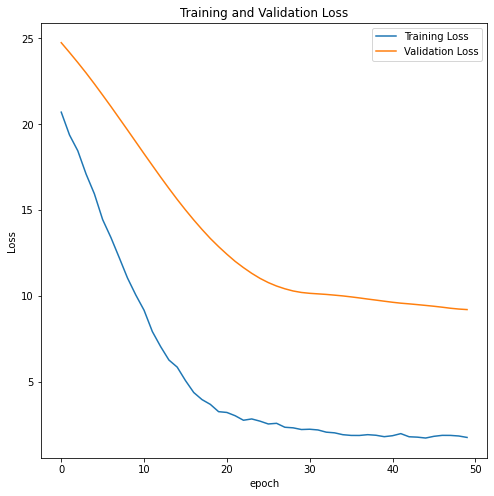

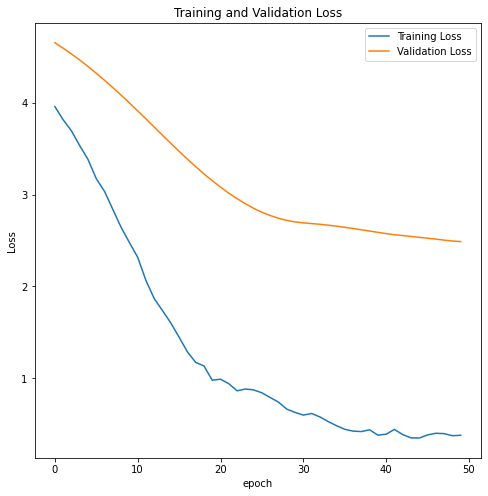

Overall spearman correlation: 0.116
------------------------------------------------------------------------
Training for fold 1, seed 6 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 18ms/sample - loss: 21.2806 - mean_absolute_error: 4.0576 - val_loss: 26.5178 - val_mean_absolute_error: 4.7456
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.0624 - mean_absolute_error: 3.9217 - val_loss: 25.8618 - val_mean_absolute_error: 4.6761
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.0278 - mean_absolute_error: 3.7972 - val_loss: 25.1709 - val_mean_absolute_error: 4.6011
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.5262 - mean_absolute_error: 3.6127 - val_loss: 24.4659 - val_mean_absolute_error: 4.5227
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.3986 - mean_absolute_error: 3.4689 - val_loss: 23.7442 - val_mean_absolut

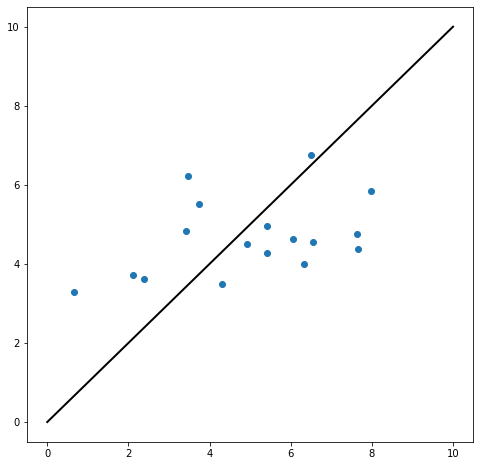

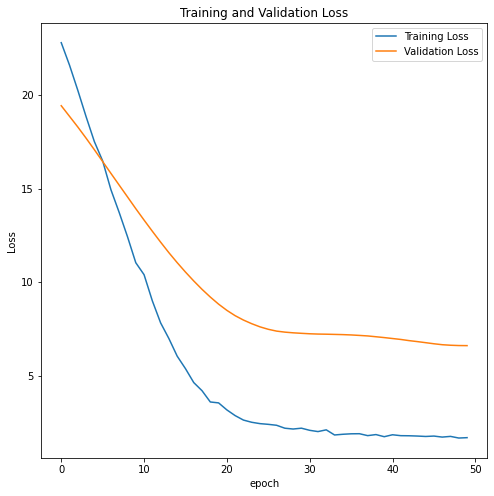

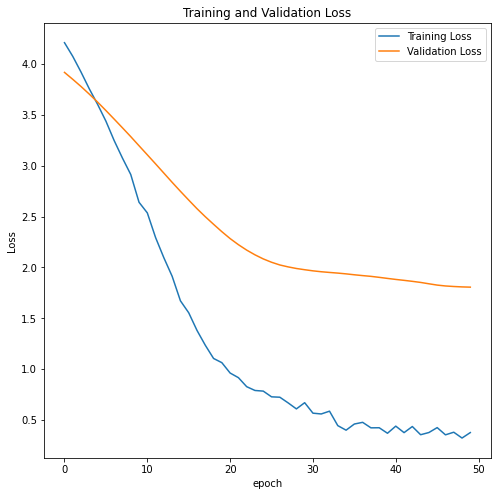

------------------------------------------------------------------------
Training for fold 2, seed 6 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 18ms/sample - loss: 20.2727 - mean_absolute_error: 3.9036 - val_loss: 23.0484 - val_mean_absolute_error: 4.3604
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.1217 - mean_absolute_error: 3.7739 - val_loss: 22.4361 - val_mean_absolute_error: 4.2916
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.0084 - mean_absolute_error: 3.6368 - val_loss: 21.8106 - val_mean_absolute_error: 4.2204
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.7745 - mean_absolute_error: 3.4904 - val_loss: 21.1854 - val_mean_absolute_error: 4.1471
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 15.6269 - mean_absolute_error: 3.3324 - val_loss: 20.5372 - val_mean_absolute_error: 4.0701
Epoch 6/50
52/52 [==

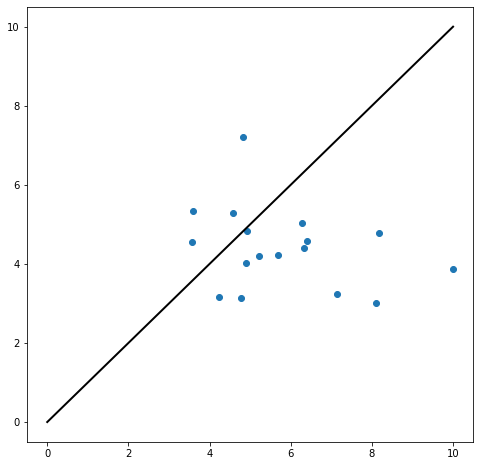

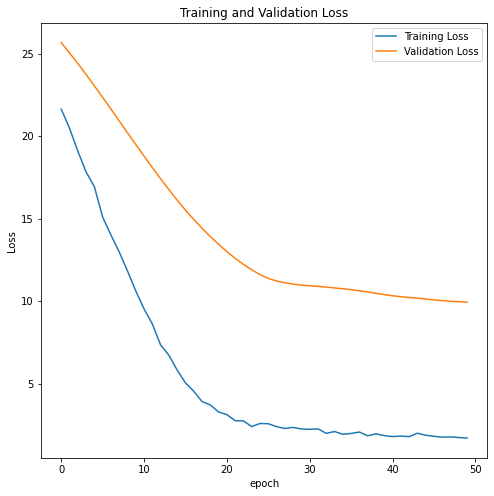

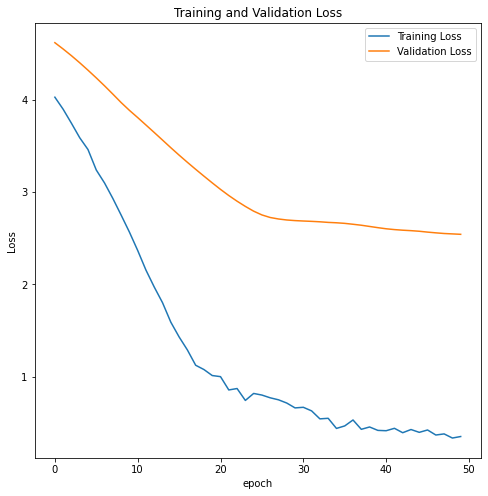

------------------------------------------------------------------------
Training for fold 3, seed 6 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 19ms/sample - loss: 21.4419 - mean_absolute_error: 4.0788 - val_loss: 24.1339 - val_mean_absolute_error: 4.5094
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.1927 - mean_absolute_error: 3.9491 - val_loss: 23.5323 - val_mean_absolute_error: 4.4425
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.8548 - mean_absolute_error: 3.7842 - val_loss: 22.8838 - val_mean_absolute_error: 4.3702
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.4979 - mean_absolute_error: 3.6169 - val_loss: 22.2078 - val_mean_absolute_error: 4.2936
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.2405 - mean_absolute_error: 3.4673 - val_loss: 21.5165 - val_mean_absolute_error: 4.2140
Epoch 6/50
52/52 [==

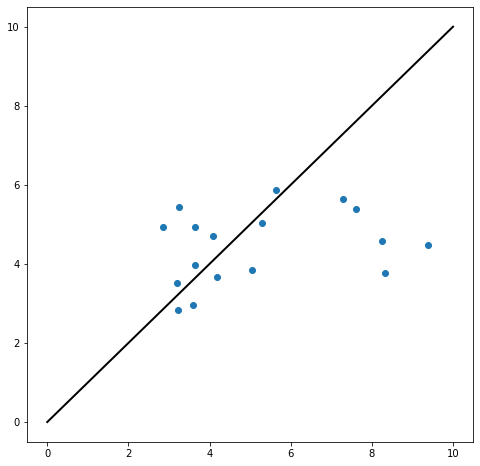

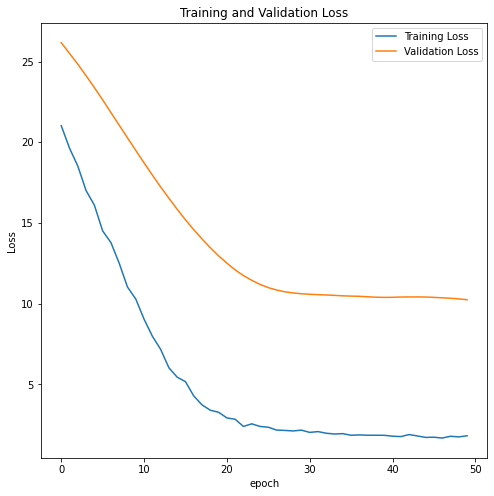

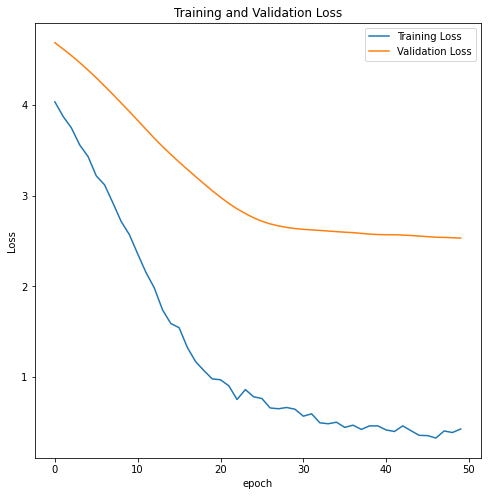

------------------------------------------------------------------------
Training for fold 4, seed 6 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 18ms/sample - loss: 23.5222 - mean_absolute_error: 4.3245 - val_loss: 20.4784 - val_mean_absolute_error: 3.9336
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 21.8994 - mean_absolute_error: 4.1389 - val_loss: 19.9365 - val_mean_absolute_error: 3.8744
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.7234 - mean_absolute_error: 4.0116 - val_loss: 19.3936 - val_mean_absolute_error: 3.8139
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.6424 - mean_absolute_error: 3.8703 - val_loss: 18.8135 - val_mean_absolute_error: 3.7485
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.9614 - mean_absolute_error: 3.6743 - val_loss: 18.2345 - val_mean_absolute_error: 3.6814
Epoch 6/50
53/53 [==

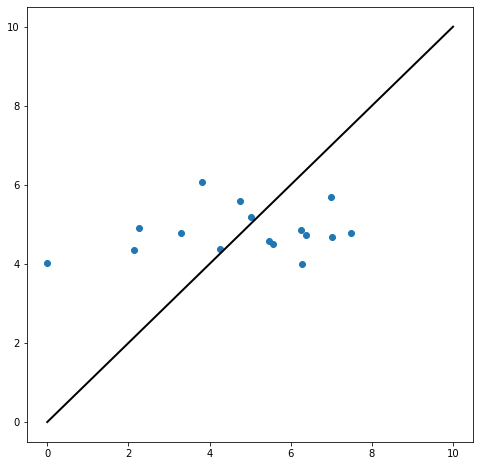

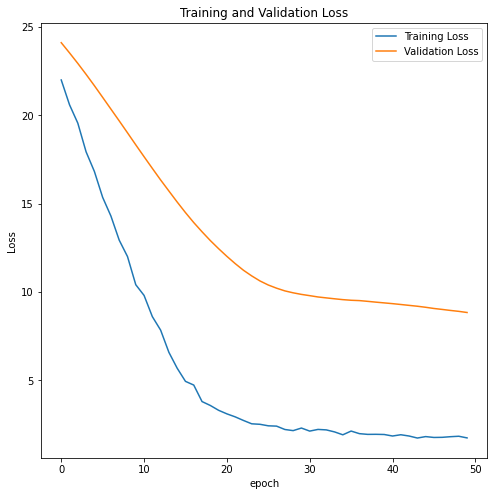

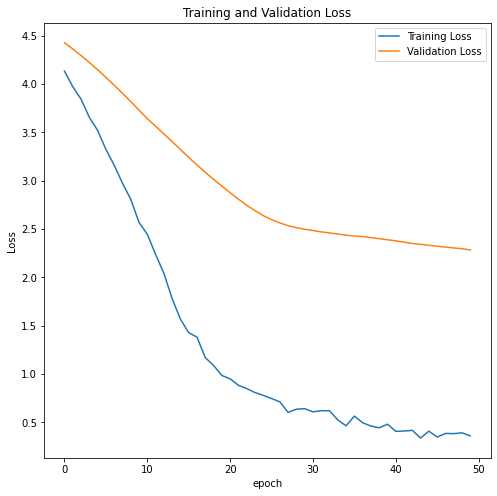

------------------------------------------------------------------------
Training for fold 5, seed 6 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 19ms/sample - loss: 21.6873 - mean_absolute_error: 4.0399 - val_loss: 25.6144 - val_mean_absolute_error: 4.6219
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.5643 - mean_absolute_error: 3.9073 - val_loss: 24.9874 - val_mean_absolute_error: 4.5534
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.4070 - mean_absolute_error: 3.7928 - val_loss: 24.3595 - val_mean_absolute_error: 4.4828
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.1274 - mean_absolute_error: 3.6289 - val_loss: 23.6956 - val_mean_absolute_error: 4.4073
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.0345 - mean_absolute_error: 3.4741 - val_loss: 23.0046 - val_mean_absolute_error: 4.3279
Epoch 6/50
53/53 [==

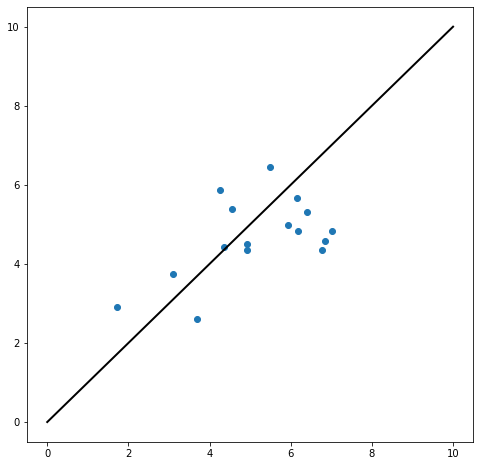

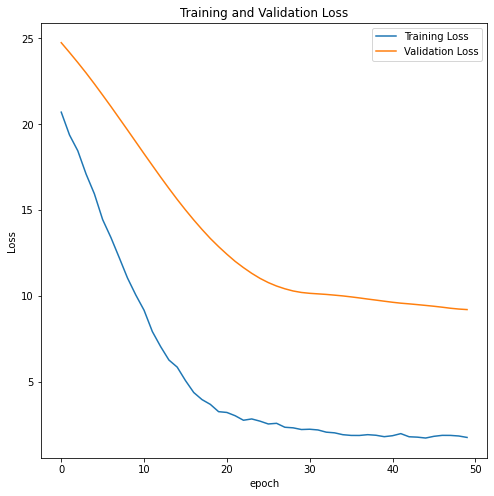

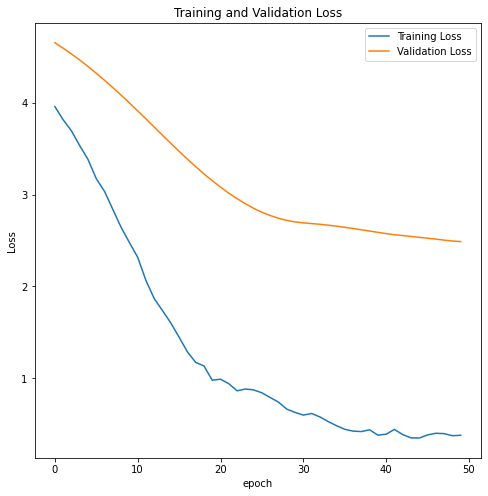

Overall spearman correlation: 0.169
------------------------------------------------------------------------
Training for fold 1, seed 7 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 20ms/sample - loss: 22.6683 - mean_absolute_error: 4.1945 - val_loss: 22.1146 - val_mean_absolute_error: 4.1525
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.4030 - mean_absolute_error: 4.0586 - val_loss: 21.5085 - val_mean_absolute_error: 4.0809
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.3116 - mean_absolute_error: 3.9321 - val_loss: 20.8806 - val_mean_absolute_error: 4.0057
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.8050 - mean_absolute_error: 3.7462 - val_loss: 20.2452 - val_mean_absolute_error: 3.9277
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.4075 - mean_absolute_error: 3.5903 - val_loss: 19.5902 - val_mean_absolut

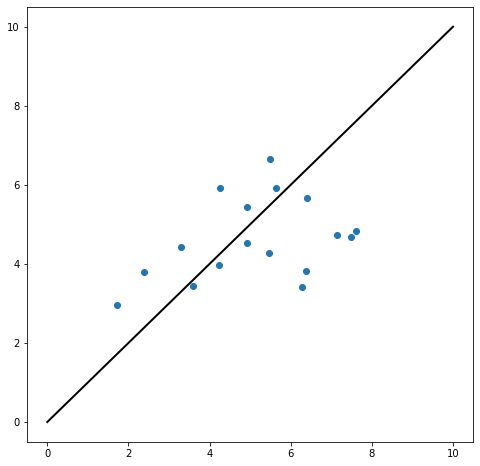

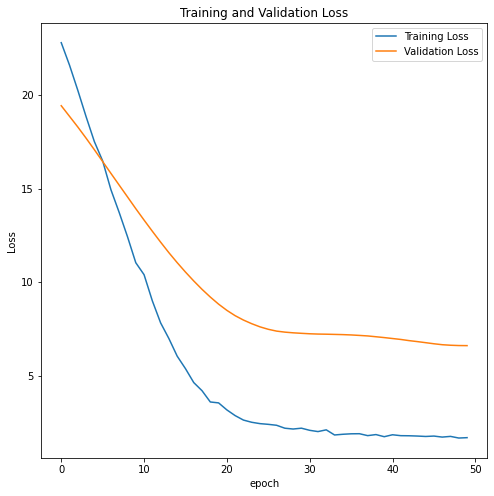

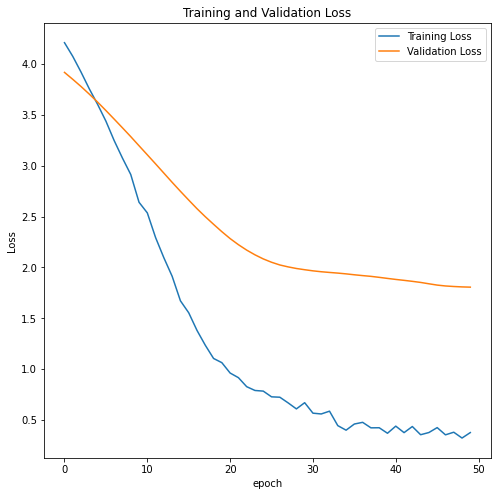

------------------------------------------------------------------------
Training for fold 2, seed 7 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 20ms/sample - loss: 20.8628 - mean_absolute_error: 3.9779 - val_loss: 26.5090 - val_mean_absolute_error: 4.7423
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.7247 - mean_absolute_error: 3.8478 - val_loss: 25.8292 - val_mean_absolute_error: 4.6685
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 18.4199 - mean_absolute_error: 3.7015 - val_loss: 25.1496 - val_mean_absolute_error: 4.5926
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.2058 - mean_absolute_error: 3.5455 - val_loss: 24.4604 - val_mean_absolute_error: 4.5137
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 15.7956 - mean_absolute_error: 3.3625 - val_loss: 23.7496 - val_mean_absolute_error: 4.4311
Epoch 6/50
52/52 [==

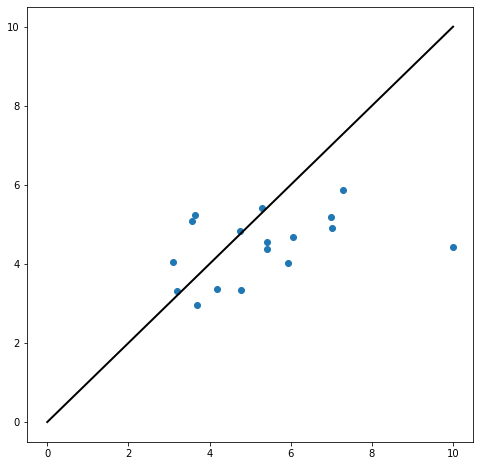

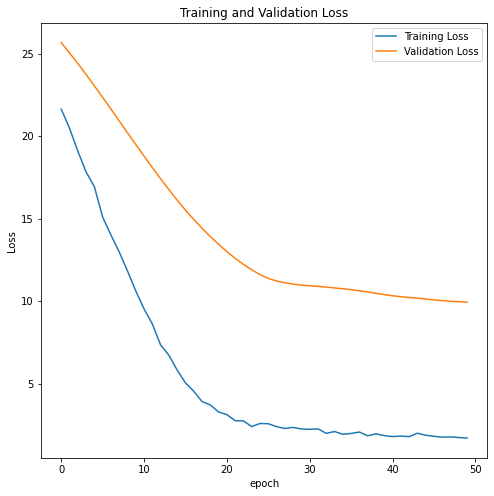

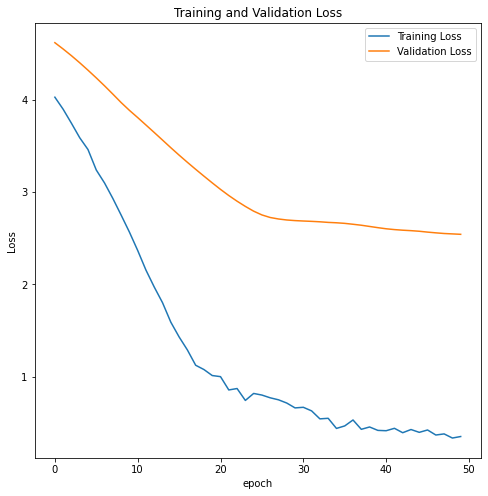

------------------------------------------------------------------------
Training for fold 3, seed 7 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 21ms/sample - loss: 22.6359 - mean_absolute_error: 4.1919 - val_loss: 26.0094 - val_mean_absolute_error: 4.7383
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.3385 - mean_absolute_error: 4.0410 - val_loss: 25.4202 - val_mean_absolute_error: 4.6775
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.0435 - mean_absolute_error: 3.9003 - val_loss: 24.8202 - val_mean_absolute_error: 4.6144
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.5538 - mean_absolute_error: 3.7144 - val_loss: 24.1792 - val_mean_absolute_error: 4.5459
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.3222 - mean_absolute_error: 3.5533 - val_loss: 23.5076 - val_mean_absolute_error: 4.4727
Epoch 6/50
52/52 [==

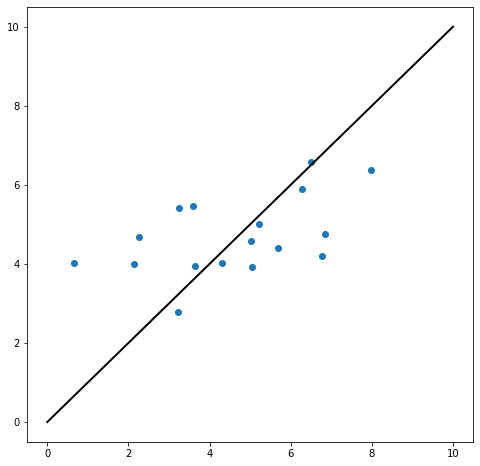

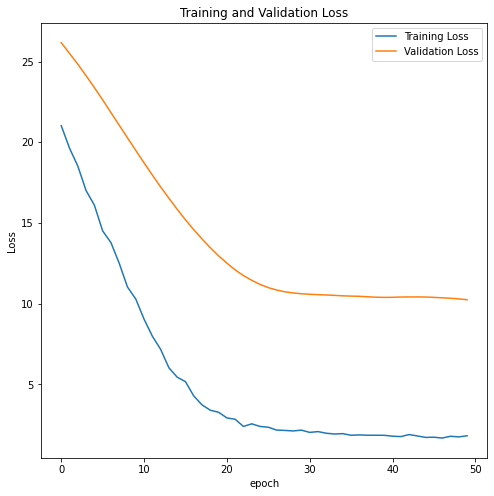

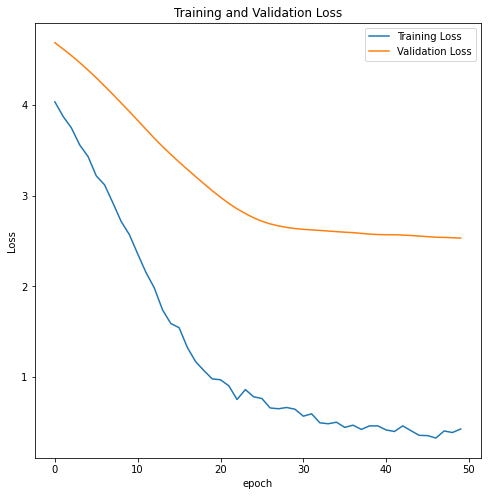

------------------------------------------------------------------------
Training for fold 4, seed 7 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 21ms/sample - loss: 21.7779 - mean_absolute_error: 4.0867 - val_loss: 20.5670 - val_mean_absolute_error: 4.0389
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.1891 - mean_absolute_error: 3.9157 - val_loss: 20.0039 - val_mean_absolute_error: 3.9756
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.8537 - mean_absolute_error: 3.7593 - val_loss: 19.4091 - val_mean_absolute_error: 3.9072
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.7922 - mean_absolute_error: 3.6297 - val_loss: 18.8051 - val_mean_absolute_error: 3.8358
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.6203 - mean_absolute_error: 3.4807 - val_loss: 18.1718 - val_mean_absolute_error: 3.7593
Epoch 6/50
53/53 [==

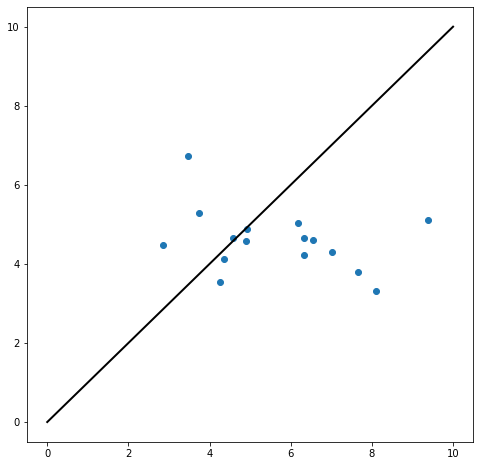

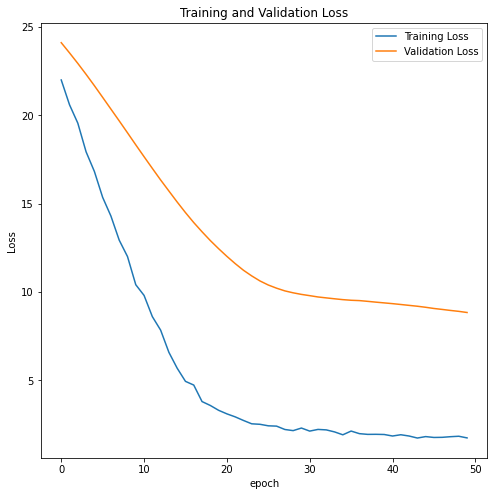

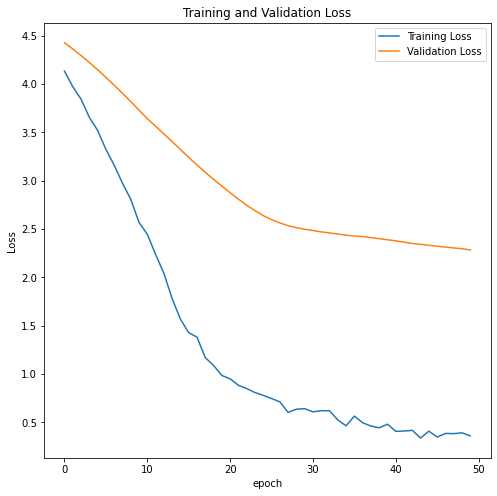

------------------------------------------------------------------------
Training for fold 5, seed 7 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 25ms/sample - loss: 21.3038 - mean_absolute_error: 4.0434 - val_loss: 23.2684 - val_mean_absolute_error: 4.4111
Epoch 2/50
53/53 [==============================] - 0s 5ms/sample - loss: 19.9251 - mean_absolute_error: 3.8760 - val_loss: 22.6486 - val_mean_absolute_error: 4.3399
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.7717 - mean_absolute_error: 3.7382 - val_loss: 22.0123 - val_mean_absolute_error: 4.2655
Epoch 4/50
53/53 [==============================] - 0s 5ms/sample - loss: 17.6034 - mean_absolute_error: 3.6013 - val_loss: 21.3596 - val_mean_absolute_error: 4.1877
Epoch 5/50
53/53 [==============================] - 0s 5ms/sample - loss: 16.3519 - mean_absolute_error: 3.4363 - val_loss: 20.6846 - val_mean_absolute_error: 4.1064
Epoch 6/50
53/53 [==

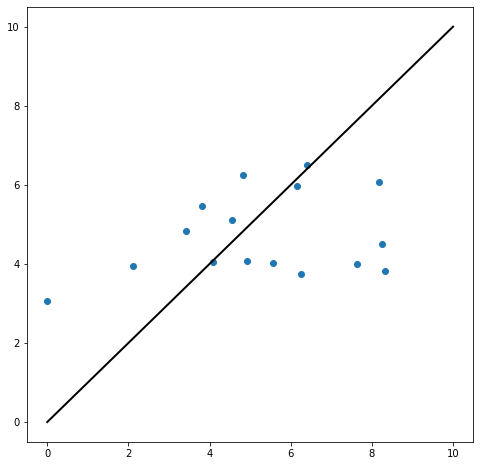

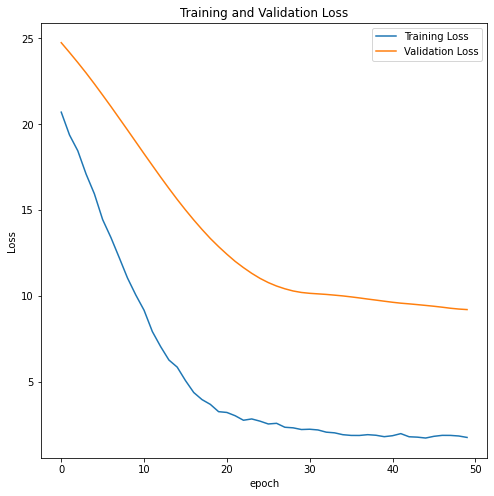

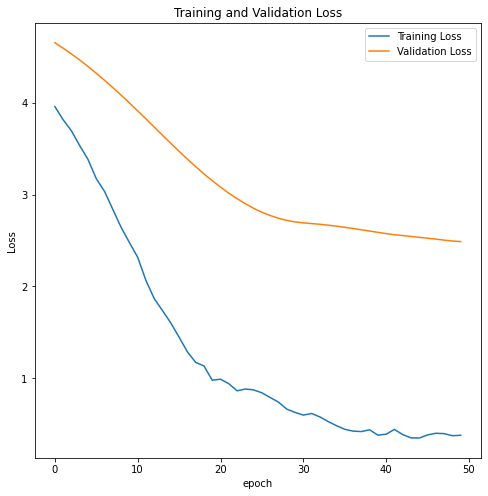

Overall spearman correlation: 0.243
------------------------------------------------------------------------
Training for fold 1, seed 8 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 25ms/sample - loss: 22.1094 - mean_absolute_error: 4.0958 - val_loss: 22.0736 - val_mean_absolute_error: 4.1860
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.6926 - mean_absolute_error: 3.9424 - val_loss: 21.5664 - val_mean_absolute_error: 4.1257
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.3417 - mean_absolute_error: 3.7767 - val_loss: 21.0316 - val_mean_absolute_error: 4.0618
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.0370 - mean_absolute_error: 3.6191 - val_loss: 20.4838 - val_mean_absolute_error: 3.9951
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 16.7692 - mean_absolute_error: 3.4571 - val_loss: 19.9061 - val_mean_absolut

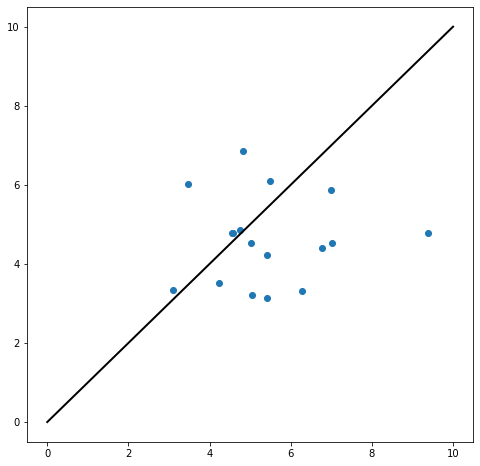

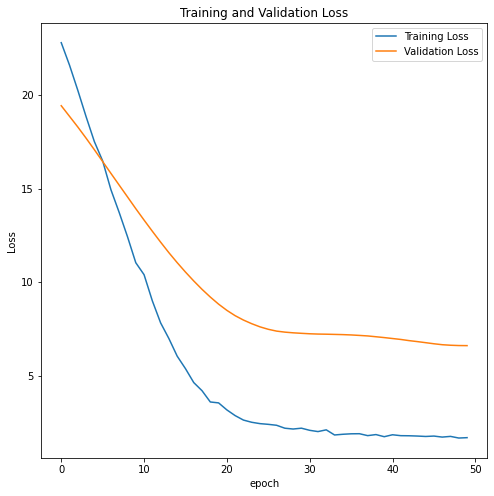

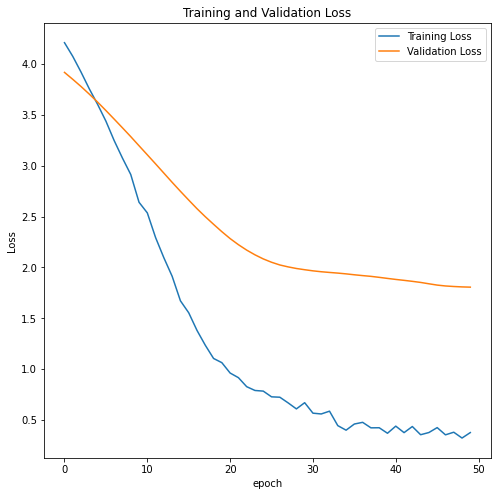

------------------------------------------------------------------------
Training for fold 2, seed 8 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 23ms/sample - loss: 21.6442 - mean_absolute_error: 4.0570 - val_loss: 23.6084 - val_mean_absolute_error: 4.4301
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.3753 - mean_absolute_error: 3.9142 - val_loss: 23.0184 - val_mean_absolute_error: 4.3637
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.2838 - mean_absolute_error: 3.7813 - val_loss: 22.4094 - val_mean_absolute_error: 4.2946
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.9168 - mean_absolute_error: 3.6124 - val_loss: 21.7742 - val_mean_absolute_error: 4.2215
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.7128 - mean_absolute_error: 3.4618 - val_loss: 21.1185 - val_mean_absolute_error: 4.1442
Epoch 6/50
52/52 [==

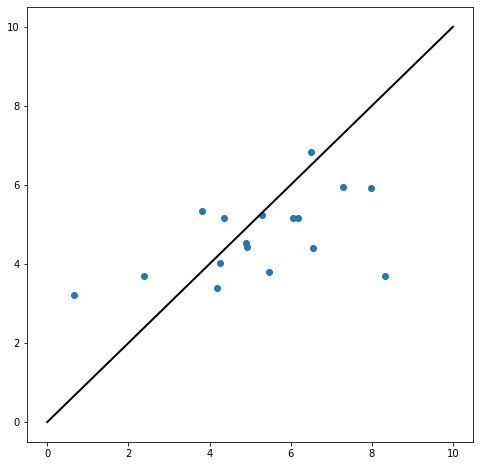

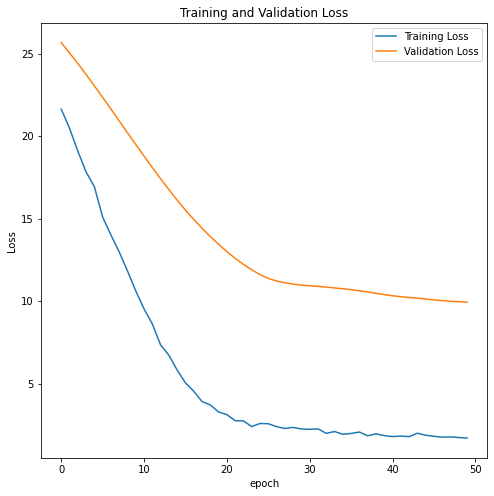

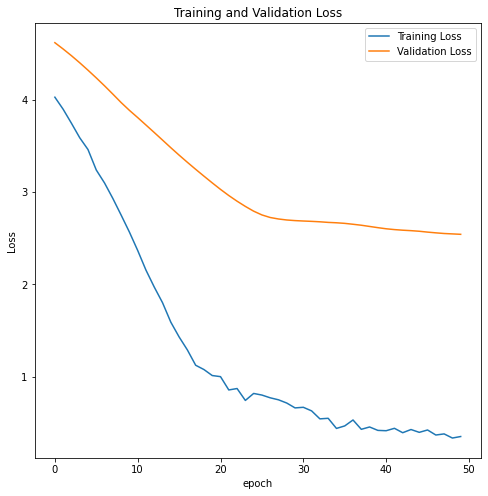

------------------------------------------------------------------------
Training for fold 3, seed 8 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 23ms/sample - loss: 21.6135 - mean_absolute_error: 4.1088 - val_loss: 26.4652 - val_mean_absolute_error: 4.7412
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.6326 - mean_absolute_error: 3.9864 - val_loss: 25.8251 - val_mean_absolute_error: 4.6733
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.2241 - mean_absolute_error: 3.8344 - val_loss: 25.1541 - val_mean_absolute_error: 4.6004
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.9498 - mean_absolute_error: 3.6742 - val_loss: 24.4795 - val_mean_absolute_error: 4.5257
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.6913 - mean_absolute_error: 3.5139 - val_loss: 23.7677 - val_mean_absolute_error: 4.4458
Epoch 6/50
52/52 [==

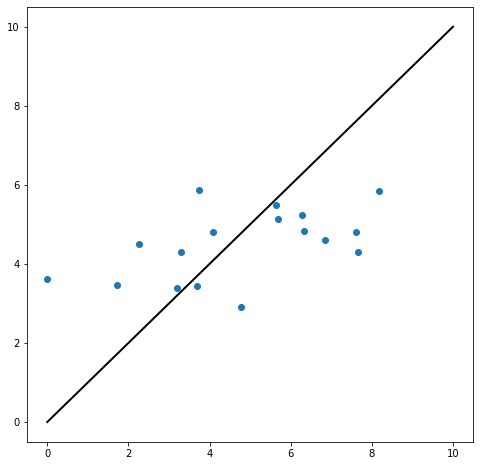

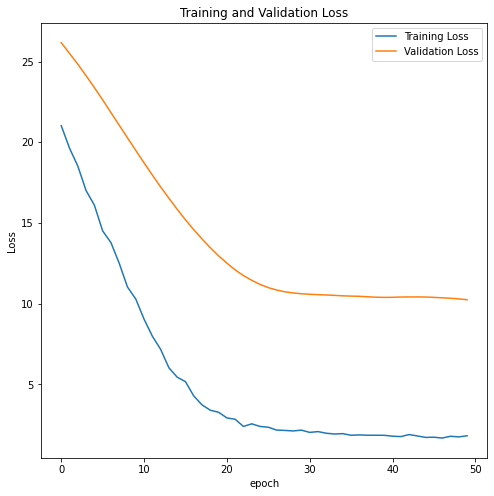

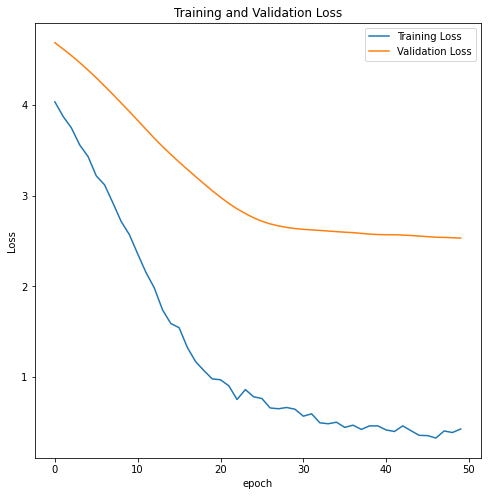

------------------------------------------------------------------------
Training for fold 4, seed 8 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 23ms/sample - loss: 21.2198 - mean_absolute_error: 4.0452 - val_loss: 23.3794 - val_mean_absolute_error: 4.4144
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.8684 - mean_absolute_error: 3.8971 - val_loss: 22.7178 - val_mean_absolute_error: 4.3388
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.6712 - mean_absolute_error: 3.7483 - val_loss: 22.0312 - val_mean_absolute_error: 4.2590
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.3610 - mean_absolute_error: 3.5885 - val_loss: 21.3203 - val_mean_absolute_error: 4.1749
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.2983 - mean_absolute_error: 3.4517 - val_loss: 20.6034 - val_mean_absolute_error: 4.0879
Epoch 6/50
53/53 [==

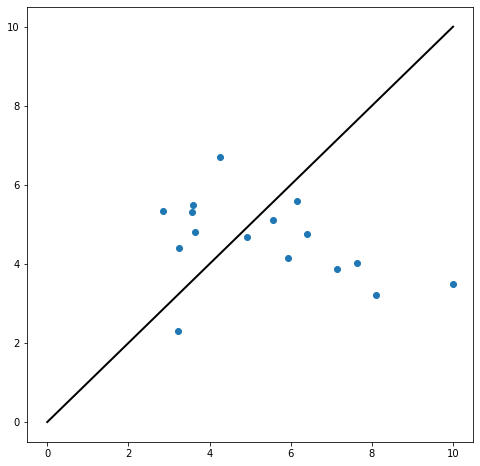

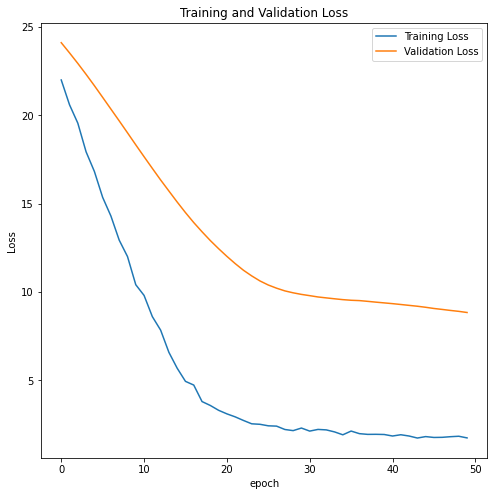

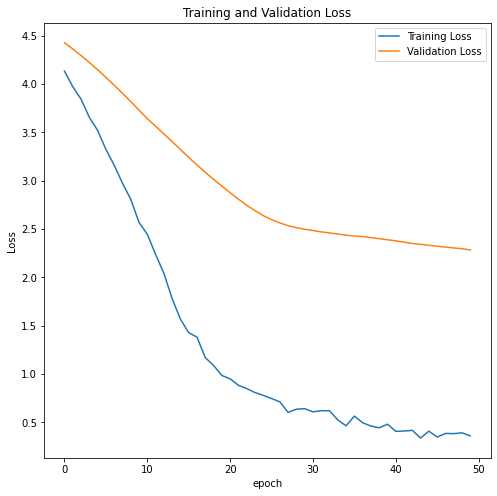

------------------------------------------------------------------------
Training for fold 5, seed 8 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 24ms/sample - loss: 22.2820 - mean_absolute_error: 4.1740 - val_loss: 23.0003 - val_mean_absolute_error: 4.2495
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.7344 - mean_absolute_error: 3.9979 - val_loss: 22.4232 - val_mean_absolute_error: 4.1908
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.5882 - mean_absolute_error: 3.8622 - val_loss: 21.8167 - val_mean_absolute_error: 4.1280
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.1370 - mean_absolute_error: 3.6950 - val_loss: 21.2017 - val_mean_absolute_error: 4.0639
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.9508 - mean_absolute_error: 3.5480 - val_loss: 20.5418 - val_mean_absolute_error: 3.9938
Epoch 6/50
53/53 [==

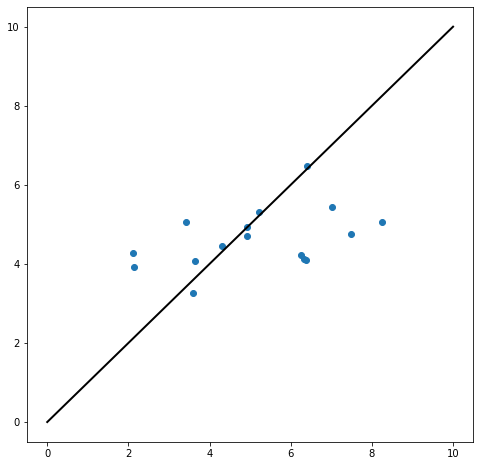

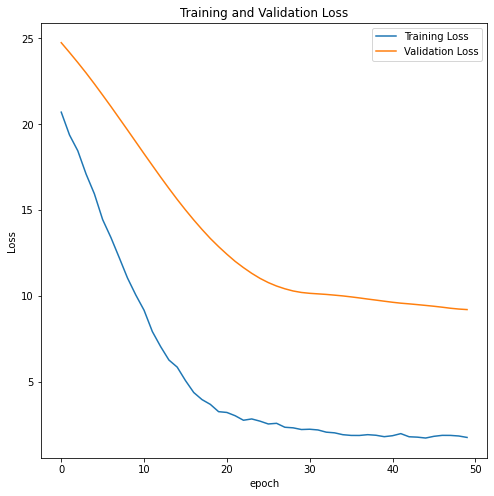

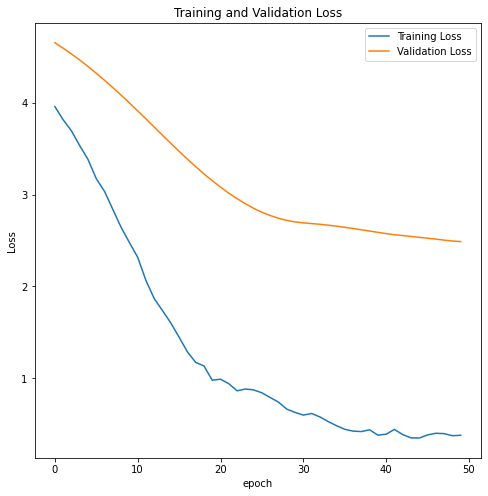

Overall spearman correlation: 0.204
------------------------------------------------------------------------
Training for fold 1, seed 9 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 25ms/sample - loss: 20.7534 - mean_absolute_error: 4.0013 - val_loss: 26.8752 - val_mean_absolute_error: 4.7629
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.4870 - mean_absolute_error: 3.8449 - val_loss: 26.1937 - val_mean_absolute_error: 4.6902
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.9448 - mean_absolute_error: 3.6814 - val_loss: 25.5001 - val_mean_absolute_error: 4.6144
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 16.9719 - mean_absolute_error: 3.5590 - val_loss: 24.7601 - val_mean_absolute_error: 4.5329
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 15.7660 - mean_absolute_error: 3.3892 - val_loss: 24.0057 - val_mean_absolut

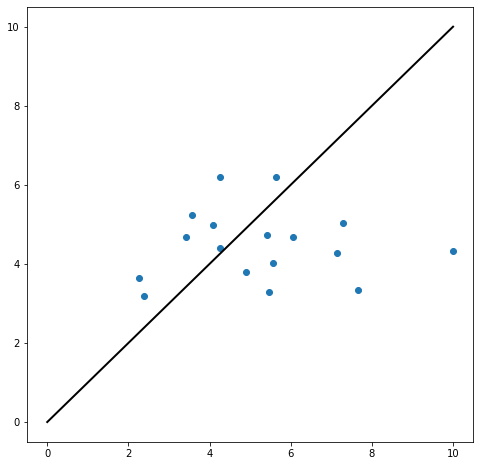

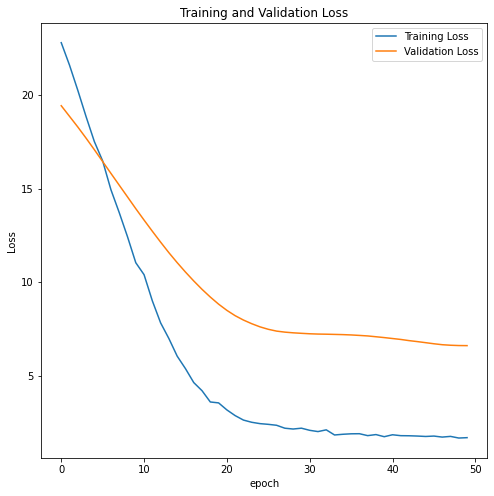

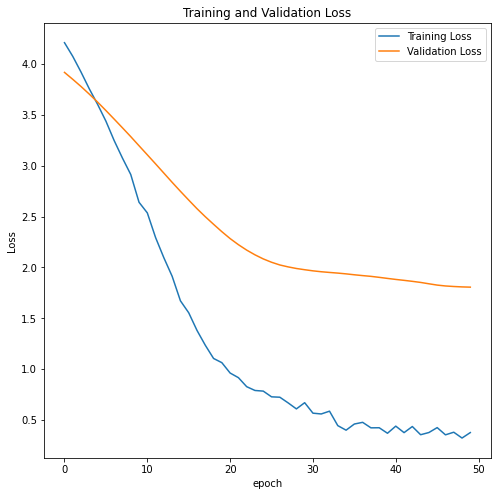

------------------------------------------------------------------------
Training for fold 2, seed 9 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 25ms/sample - loss: 20.3628 - mean_absolute_error: 3.9143 - val_loss: 25.3751 - val_mean_absolute_error: 4.7343
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.2027 - mean_absolute_error: 3.7788 - val_loss: 24.7289 - val_mean_absolute_error: 4.6651
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.8075 - mean_absolute_error: 3.6074 - val_loss: 24.0695 - val_mean_absolute_error: 4.5940
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 16.7223 - mean_absolute_error: 3.4746 - val_loss: 23.3711 - val_mean_absolute_error: 4.5174
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 15.4255 - mean_absolute_error: 3.2965 - val_loss: 22.6699 - val_mean_absolute_error: 4.4388
Epoch 6/50
52/52 [==

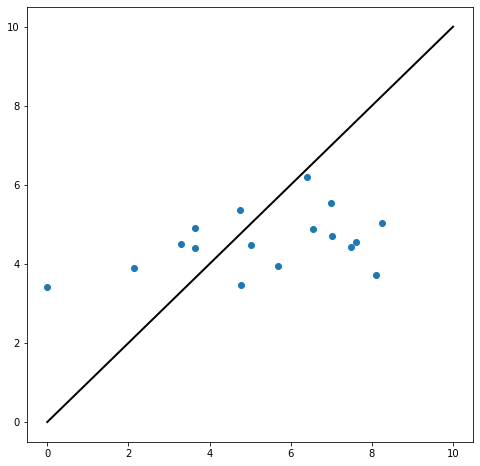

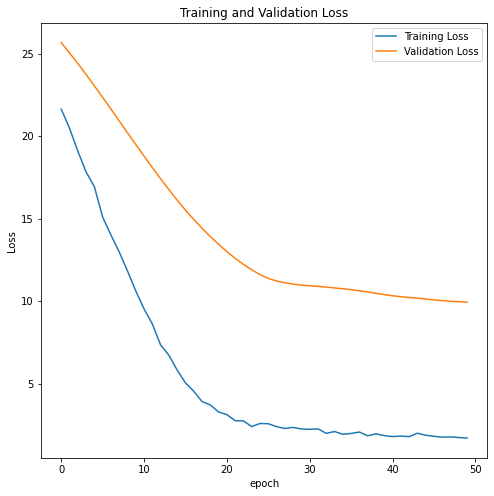

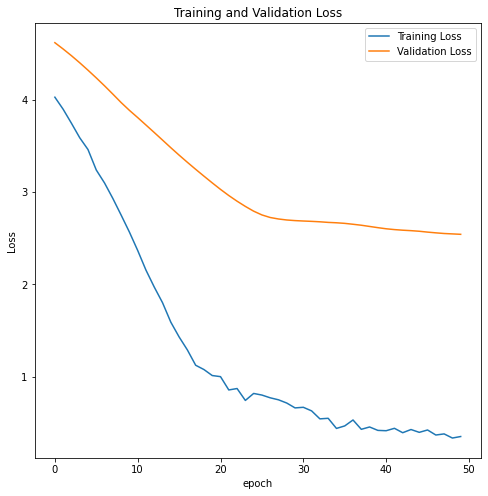

------------------------------------------------------------------------
Training for fold 3, seed 9 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 24ms/sample - loss: 23.9578 - mean_absolute_error: 4.3242 - val_loss: 22.5628 - val_mean_absolute_error: 4.2586
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 22.5321 - mean_absolute_error: 4.1788 - val_loss: 21.9892 - val_mean_absolute_error: 4.1899
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.3352 - mean_absolute_error: 4.0417 - val_loss: 21.3822 - val_mean_absolute_error: 4.1173
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.8017 - mean_absolute_error: 3.8569 - val_loss: 20.7685 - val_mean_absolute_error: 4.0426
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.6321 - mean_absolute_error: 3.7074 - val_loss: 20.1321 - val_mean_absolute_error: 3.9638
Epoch 6/50
52/52 [==

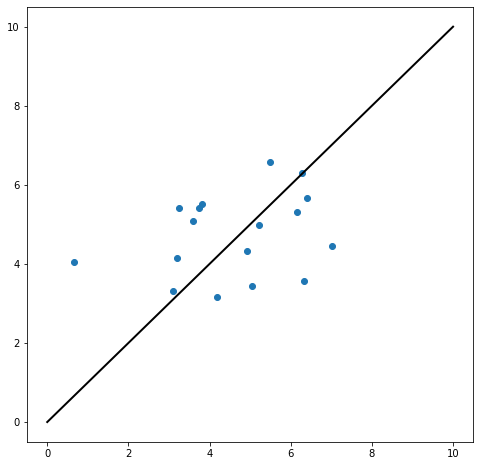

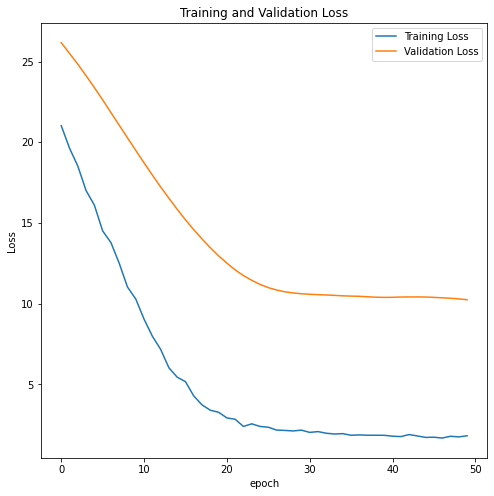

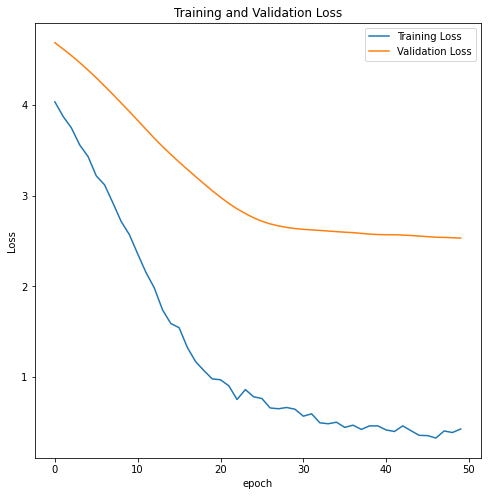

------------------------------------------------------------------------
Training for fold 4, seed 9 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 26ms/sample - loss: 20.5148 - mean_absolute_error: 3.9346 - val_loss: 22.8532 - val_mean_absolute_error: 4.3492
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.4562 - mean_absolute_error: 3.8171 - val_loss: 22.3138 - val_mean_absolute_error: 4.2870
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.1009 - mean_absolute_error: 3.6557 - val_loss: 21.7348 - val_mean_absolute_error: 4.2201
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.6817 - mean_absolute_error: 3.4966 - val_loss: 21.1464 - val_mean_absolute_error: 4.1506
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 15.4573 - mean_absolute_error: 3.3138 - val_loss: 20.5378 - val_mean_absolute_error: 4.0777
Epoch 6/50
53/53 [==

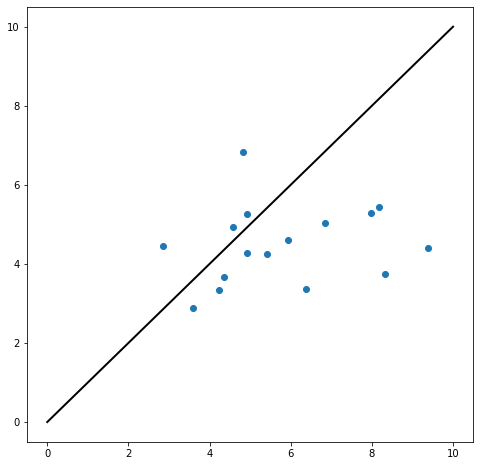

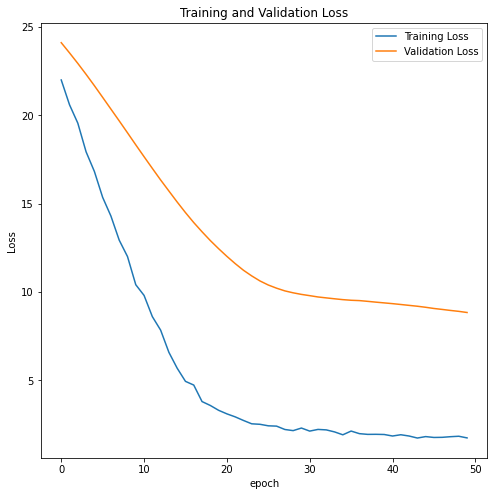

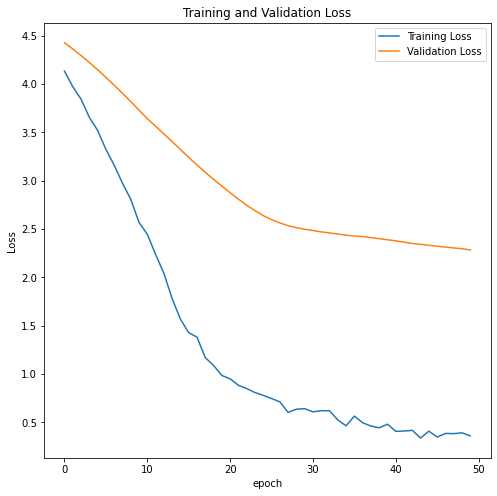

------------------------------------------------------------------------
Training for fold 5, seed 9 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 25ms/sample - loss: 22.9800 - mean_absolute_error: 4.2197 - val_loss: 23.0086 - val_mean_absolute_error: 4.2970
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 21.5634 - mean_absolute_error: 4.0644 - val_loss: 22.4199 - val_mean_absolute_error: 4.2274
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.0966 - mean_absolute_error: 3.9008 - val_loss: 21.8100 - val_mean_absolute_error: 4.1539
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.8990 - mean_absolute_error: 3.7506 - val_loss: 21.1775 - val_mean_absolute_error: 4.0767
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.7257 - mean_absolute_error: 3.6066 - val_loss: 20.5318 - val_mean_absolute_error: 3.9963
Epoch 6/50
53/53 [==

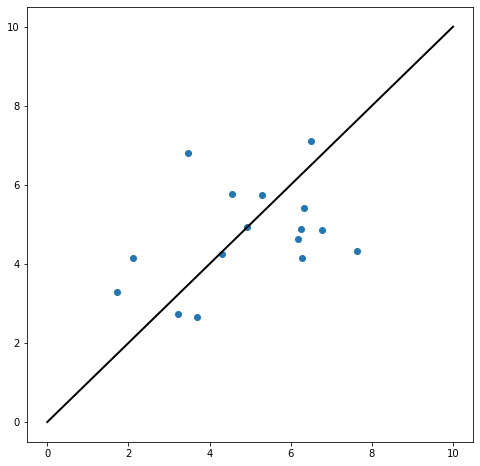

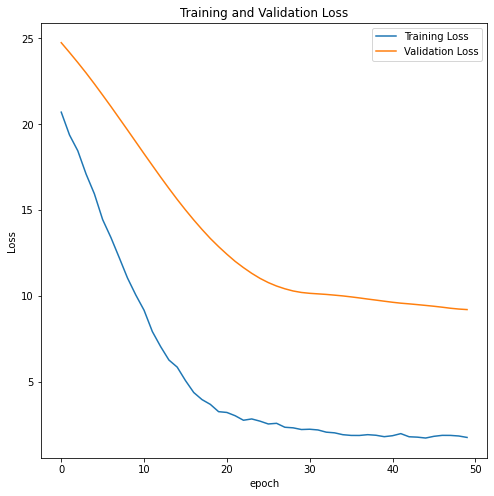

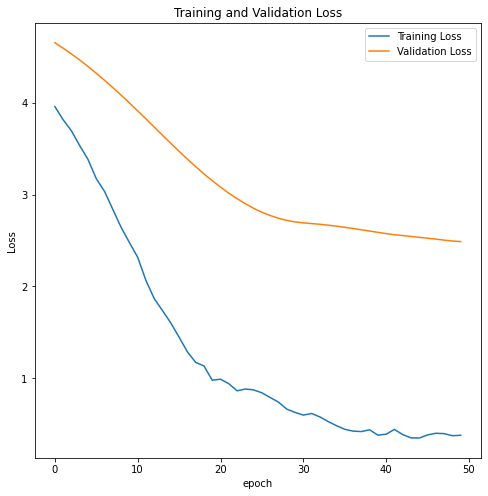

Overall spearman correlation: 0.233
------------------------------------------------------------------------
Training for fold 1, seed 10 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 27ms/sample - loss: 22.2074 - mean_absolute_error: 4.0923 - val_loss: 23.2984 - val_mean_absolute_error: 4.3750
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.9967 - mean_absolute_error: 3.9625 - val_loss: 22.6869 - val_mean_absolute_error: 4.3075
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 19.7964 - mean_absolute_error: 3.8256 - val_loss: 22.0699 - val_mean_absolute_error: 4.2373
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.2319 - mean_absolute_error: 3.6377 - val_loss: 21.4295 - val_mean_absolute_error: 4.1633
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.2475 - mean_absolute_error: 3.5146 - val_loss: 20.7580 - val_mean_absolu

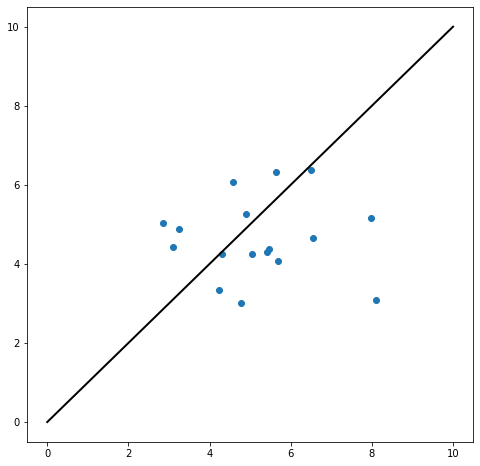

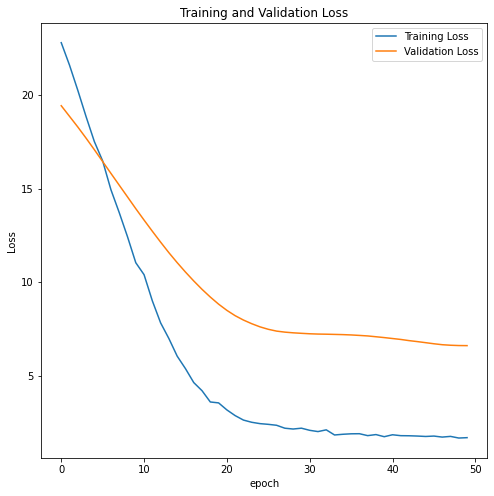

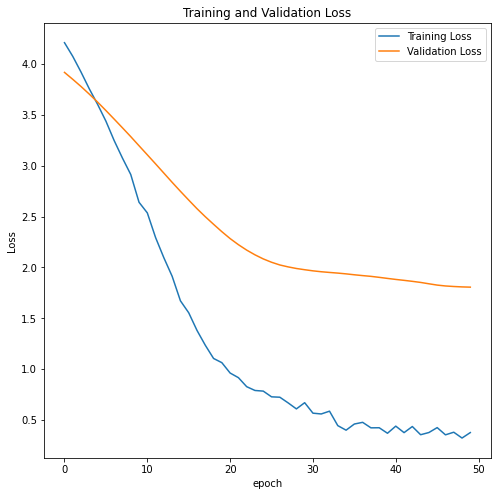

------------------------------------------------------------------------
Training for fold 2, seed 10 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 28ms/sample - loss: 20.9154 - mean_absolute_error: 3.9854 - val_loss: 24.7044 - val_mean_absolute_error: 4.5232
Epoch 2/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.5156 - mean_absolute_error: 3.8267 - val_loss: 24.0587 - val_mean_absolute_error: 4.4515
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.3249 - mean_absolute_error: 3.6833 - val_loss: 23.3870 - val_mean_absolute_error: 4.3760
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.0999 - mean_absolute_error: 3.5292 - val_loss: 22.6979 - val_mean_absolute_error: 4.2977
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 15.7878 - mean_absolute_error: 3.3641 - val_loss: 22.0069 - val_mean_absolute_error: 4.2171
Epoch 6/50
52/52 [=

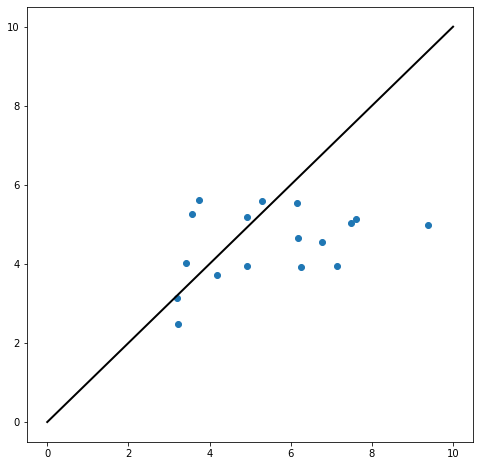

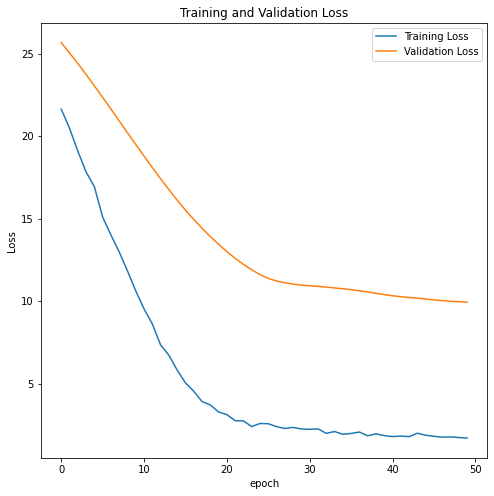

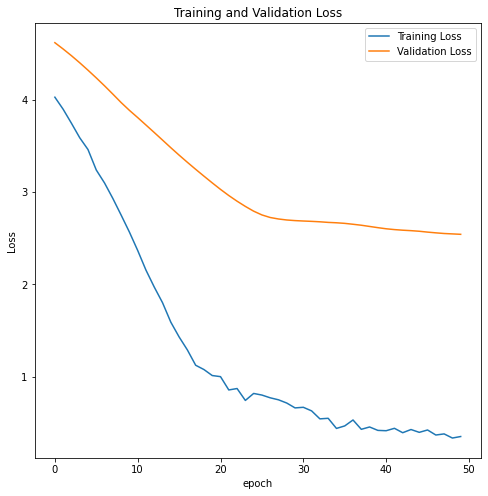

------------------------------------------------------------------------
Training for fold 3, seed 10 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 1s 28ms/sample - loss: 22.9308 - mean_absolute_error: 4.2254 - val_loss: 22.5350 - val_mean_absolute_error: 4.2321
Epoch 2/50
52/52 [==============================] - 0s 4ms/sample - loss: 21.5243 - mean_absolute_error: 4.0782 - val_loss: 21.9396 - val_mean_absolute_error: 4.1638
Epoch 3/50
52/52 [==============================] - 0s 4ms/sample - loss: 20.2707 - mean_absolute_error: 3.9279 - val_loss: 21.3234 - val_mean_absolute_error: 4.0921
Epoch 4/50
52/52 [==============================] - 0s 4ms/sample - loss: 18.9045 - mean_absolute_error: 3.7680 - val_loss: 20.7006 - val_mean_absolute_error: 4.0185
Epoch 5/50
52/52 [==============================] - 0s 4ms/sample - loss: 17.7985 - mean_absolute_error: 3.6337 - val_loss: 20.0621 - val_mean_absolute_error: 3.9422
Epoch 6/50
52/52 [=

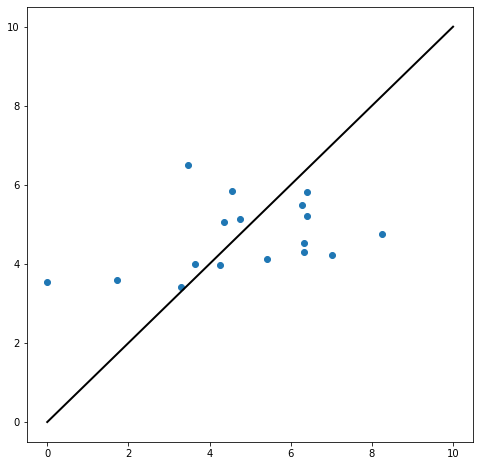

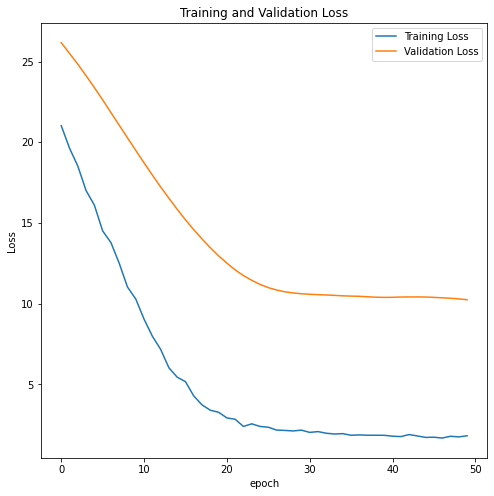

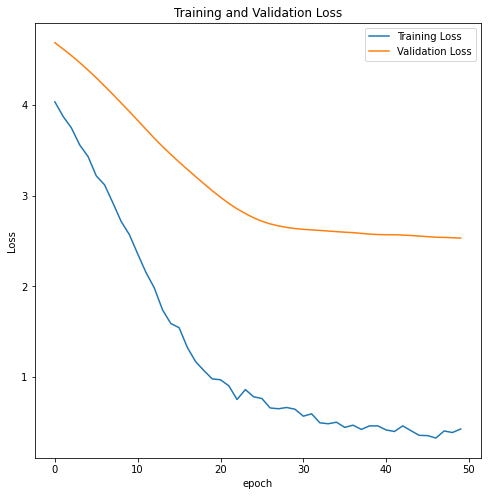

------------------------------------------------------------------------
Training for fold 4, seed 10 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 27ms/sample - loss: 21.8586 - mean_absolute_error: 4.0840 - val_loss: 24.0019 - val_mean_absolute_error: 4.5847
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 20.7095 - mean_absolute_error: 3.9557 - val_loss: 23.3914 - val_mean_absolute_error: 4.5172
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.3966 - mean_absolute_error: 3.7999 - val_loss: 22.7637 - val_mean_absolute_error: 4.4466
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 18.2406 - mean_absolute_error: 3.6591 - val_loss: 22.1125 - val_mean_absolute_error: 4.3722
Epoch 5/50
53/53 [==============================] - 0s 5ms/sample - loss: 16.6083 - mean_absolute_error: 3.4511 - val_loss: 21.4333 - val_mean_absolute_error: 4.2933
Epoch 6/50
53/53 [=

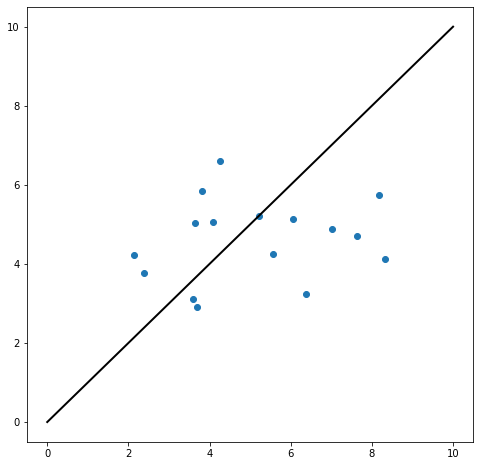

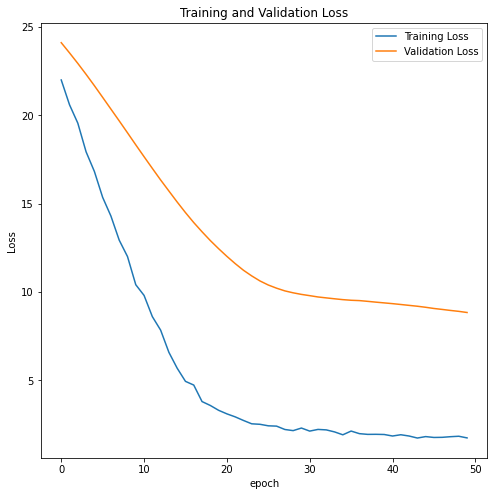

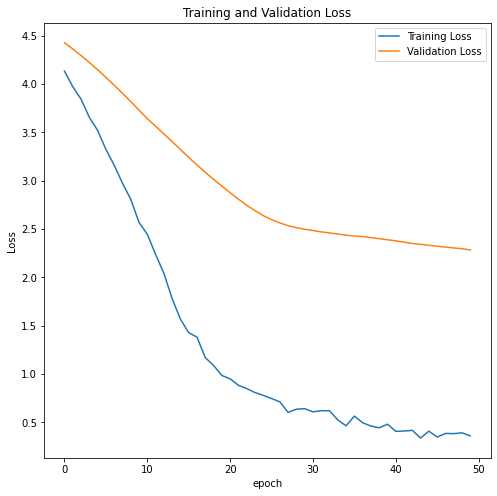

------------------------------------------------------------------------
Training for fold 5, seed 10 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 1s 28ms/sample - loss: 20.4609 - mean_absolute_error: 3.9944 - val_loss: 25.9744 - val_mean_absolute_error: 4.6550
Epoch 2/50
53/53 [==============================] - 0s 4ms/sample - loss: 19.0734 - mean_absolute_error: 3.8334 - val_loss: 25.3729 - val_mean_absolute_error: 4.5870
Epoch 3/50
53/53 [==============================] - 0s 4ms/sample - loss: 17.8619 - mean_absolute_error: 3.6913 - val_loss: 24.7737 - val_mean_absolute_error: 4.5175
Epoch 4/50
53/53 [==============================] - 0s 4ms/sample - loss: 16.9695 - mean_absolute_error: 3.5720 - val_loss: 24.1689 - val_mean_absolute_error: 4.4453
Epoch 5/50
53/53 [==============================] - 0s 4ms/sample - loss: 15.2392 - mean_absolute_error: 3.3539 - val_loss: 23.5272 - val_mean_absolute_error: 4.3682
Epoch 6/50
53/53 [=

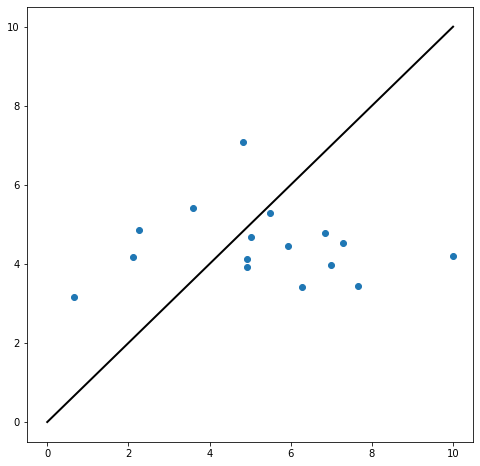

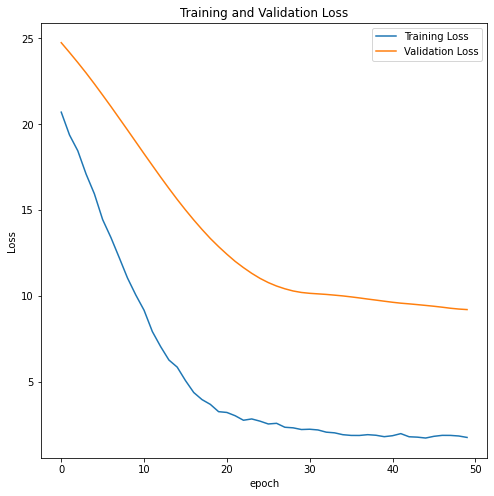

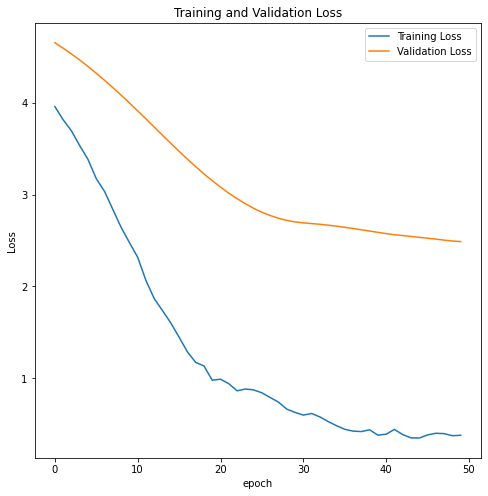

Overall spearman correlation: 0.147


In [23]:
## run model
loss = []
val_loss = []
mse = []
val_mse = []
overall_cor_res = []
corr_list_all = []
total_time_list = []

# K-fold Cross Validation model evaluation

fold_no = 0
# for train_index, test_index in kfold.split(impress1,auc_bi):
for k in range(0,10):
    
    exp_train = [0]*5
    exp_test = [0]*5
    auc_train = [0]*5
    auc_test = [0]*5
    pred_res = []
    corr_list = []
      
    for fold_no in range(0,5):
        
        # split dataset
        exp_train[fold_no], exp_test[fold_no] = hgcc.iloc[train_index[k][fold_no],:], hgcc.iloc[test_index[k][fold_no],:]
        auc_train[fold_no], auc_test[fold_no] = auc_norm["AUC_Temozolomide"][train_index[k][fold_no]], auc_norm["AUC_Temozolomide"][test_index[k][fold_no]]

        
        # normalize
        exp_train[fold_no] = Robust.fit_transform(exp_train[fold_no])
        exp_test[fold_no] = Robust.fit_transform(exp_test[fold_no])
    
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {(fold_no+1)}, seed {k+1} ...')
    
        # Create a basic model instance
        pred_model = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001))

        # Measure training time
        start_time = time.time()
        # es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) # mode='min', 
        refine_model = pred_model.fit(x=exp_train[fold_no], y=auc_train[fold_no], epochs=50, batch_size=32,#
                                      # validation_data = (exp_test[fold_no],auc_test[fold_no].to_numpy())
                                      validation_split=0.2
                                     ) 
        #  callbacks=[es],
        end_time = time.time()
        total_time = end_time - start_time
        print(f"Total training time: {total_time:.2f} seconds")
        total_time_list.append(total_time)

    
        # predict and evaluate
        pred = pred_model.predict(exp_test[fold_no])
        pred = pd.DataFrame(pred)
        pred_res.append(pred)
        test = auc_test[fold_no].reset_index(drop = True)
        # print(R2(test,pred[0]))
    
        # calculate Pearson's correlation
        corr, _ = spearmanr(test, pred[0])
        print('Spearman correlation: %.3f' % corr)
        corr_list.append(corr)
    
        plt.figure(figsize=(8, 8))
        plt.scatter(test,pred[0])
        plt.plot([0, 10], [0, 10], 'k-', lw=2)
    
        # plot loss train and validate
        loss.append(refine_model.history['loss'])
        val_loss.append(refine_model.history['val_loss'])
        plt_loss(loss[fold_no],val_loss[fold_no],fold_no+1)
    
        # plot acc train and validate
        mse.append(refine_model.history['mean_absolute_error'])
        val_mse.append(refine_model.history['val_mean_absolute_error'])
        plt_loss(mse[fold_no],val_mse[fold_no],fold_no+1)

        
    corr_list_all.append(corr_list)
    # test_all
    test_all = np.concatenate([auc_test[0],auc_test[1],auc_test[2],auc_test[3],auc_test[4]])#
    # pred_all 
    pred_all = np.concatenate([pred_res[0][0],pred_res[1][0],pred_res[2][0],pred_res[3][0],pred_res[4][0]])#
    overall_cor, _ = spearmanr(test_all, pred_all)
    overall_cor_res.append(overall_cor)
    print('Overall spearman correlation: %.3f' % overall_cor)
    
    # break

In [24]:
overall_cor_res

[0.2185676503925108,
 0.2231224549767012,
 0.2355484656395617,
 0.21814785273498172,
 0.11638890054993492,
 0.16892657738969816,
 0.24310482347508497,
 0.20358087401872296,
 0.2327568112169934,
 0.14692918013517484]

In [25]:
np.mean(overall_cor_res)

0.21610553713110278